In [278]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [279]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [280]:
#Start with spring and work our way down to winter
season = 1
season_year = 2003
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2003-03-01 to 2003-05-31
Columns: 282 entries, 10000009 to 22000047
dtypes: float64(282)
memory usage: 203.4 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2003-03-01  0.719098  0.633134  0.402416  0.873913  0.518788  0.868427   
2003-03-02  0.731518  0.626435  0.394470  0.870320  0.517001  0.855808   
2003-03-03  0.735504  0.630043  0.386401  0.867998  0.509789  0.832206   
2003-03-04  0.718705  0.620850  0.380518  0.858780  0.504554  0.810373   
2003-03-05  0.724374  0.626789  0.376329  0.850637  0.510399  0.795027   
...              ...       ...       ...       ...       ...       ...   
2003-05-27  1.030255  0.639478  0.513630  0.926578  0.614981  0.988220   
2003-05-28  0.913217  0.615853  0.474485  0.848781  0.585608  0.977128   
2003-05-29  0.856118  0.594955  0.455729  0.826893  0.553501  0.948032   
2003-05-30  0.820139  0.582395  0.444025  0.816843  0.523813  0.923748   
2003-05-31  0.795674  0.571933  0.435124  0.806025  0.510945  0.888793   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2003-03-01  0.760765  0.482916  

          2003-03-01  2003-03-02  2003-03-03  2003-03-04  2003-03-05  \
10000009   -0.048036   -0.046999   -0.046728   -0.048115   -0.047112   
10000010   -0.055488   -0.056151   -0.055874   -0.056558   -0.055507   
10000011   -0.075490   -0.076353   -0.077004   -0.077294   -0.077055   
10000014   -0.034615   -0.034910   -0.035237   -0.036029   -0.036249   
10000016   -0.065401   -0.065681   -0.066303   -0.066592   -0.065521   
...              ...         ...         ...         ...         ...   
7000003    -0.075718   -0.075963   -0.075830   -0.075760   -0.075032   
8000001    -0.064999   -0.065598   -0.065809   -0.066122   -0.065896   
9000001     0.002561    0.002577    0.000929   -0.001330    0.000028   
9000015     0.000052    0.000070   -0.001450   -0.003519   -0.002238   
22000047   -0.053573   -0.053223   -0.052994   -0.052345   -0.050712   

          2003-03-06  2003-03-07  2003-03-08  2003-03-09  2003-03-10  ...  \
10000009   -0.046892   -0.048087   -0.049369   -0.050886  

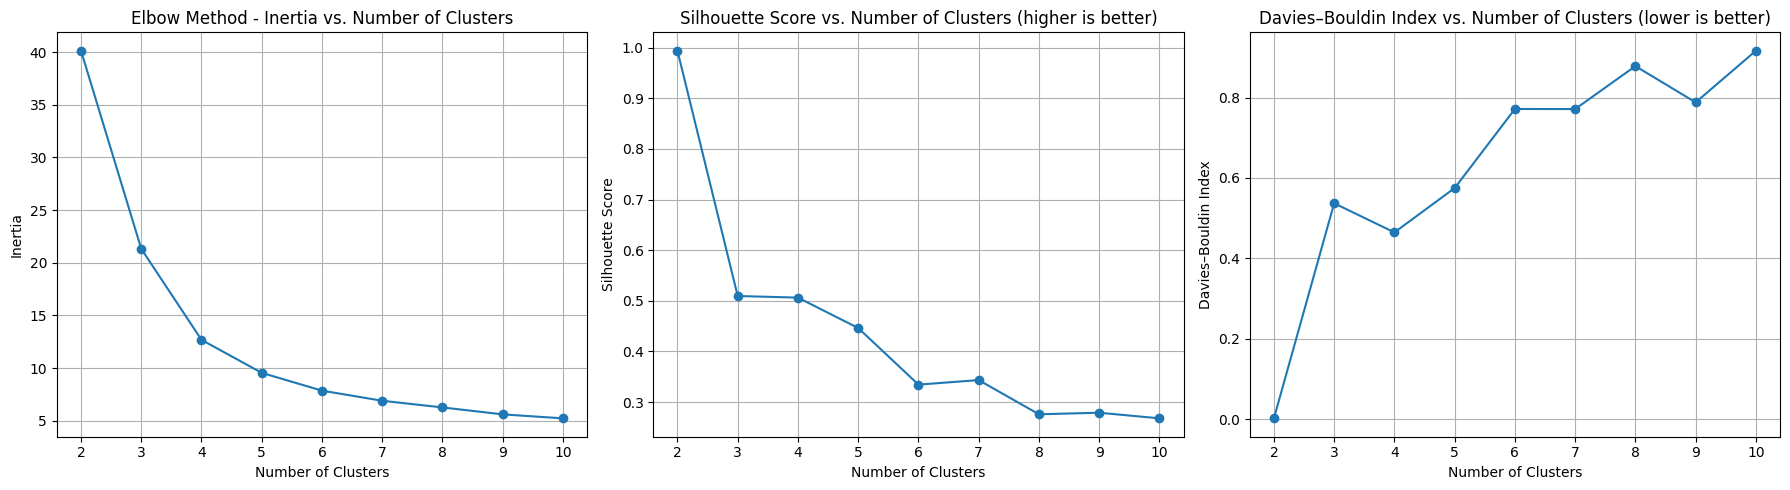

In [281]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2003-03-01  0.719098  0.633134  0.402416  0.873913  0.518788  0.868427   
2003-03-02  0.731518  0.626435  0.394470  0.870320  0.517001  0.855808   
2003-03-03  0.735504  0.630043  0.386401  0.867998  0.509789  0.832206   
2003-03-04  0.718705  0.620850  0.380518  0.858780  0.504554  0.810373   
2003-03-05  0.724374  0.626789  0.376329  0.850637  0.510399  0.795027   
...              ...       ...       ...       ...       ...       ...   
2003-05-27  1.030255  0.639478  0.513630  0.926578  0.614981  0.988220   
2003-05-28  0.913217  0.615853  0.474485  0.848781  0.585608  0.977128   
2003-05-29  0.856118  0.594955  0.455729  0.826893  0.553501  0.948032   
2003-05-30  0.820139  0.582395  0.444025  0.816843  0.523813  0.923748   
2003-05-31  0.795674  0.571933  0.435124  0.806025  0.510945  0.888793   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2003-03-01  0.760765  0.482916  

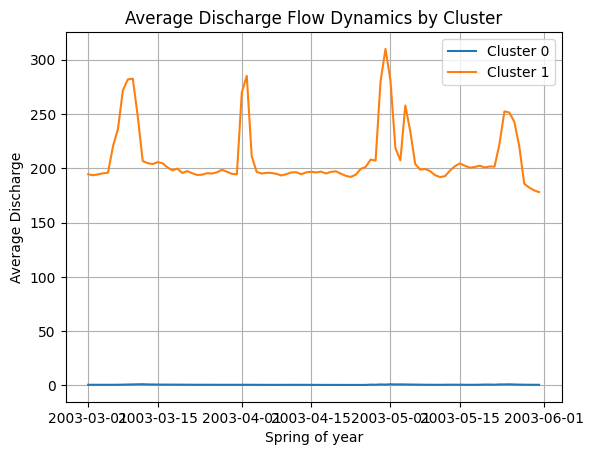

In [282]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [283]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [284]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2003-03-01  0.719098  0.633134  0.402416  0.873913  0.518788  0.868427   
2003-03-02  0.731518  0.626435  0.394470  0.870320  0.517001  0.855808   
2003-03-03  0.735504  0.630043  0.386401  0.867998  0.509789  0.832206   
2003-03-04  0.718705  0.620850  0.380518  0.858780  0.504554  0.810373   
2003-03-05  0.724374  0.626789  0.376329  0.850637  0.510399  0.795027   
...              ...       ...       ...       ...       ...       ...   
2003-05-27  1.030255  0.639478  0.513630  0.926578  0.614981  0.988220   
2003-05-28  0.913217  0.615853  0.474485  0.848781  0.585608  0.977128   
2003-05-29  0.856118  0.594955  0.455729  0.826893  0.553501  0.948032   
2003-05-30  0.820139  0.582395  0.444025  0.816843  0.523813  0.923748   
2003-05-31  0.795674  0.571933  0.435124  0.806025  0.510945  0.888793   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2003-03-01  0.760765  0.482916  0.795296  0.954115  ...  0.665490  0.320477   
2003-03-02  0.747512  0.485108  0.791737  0.958346  ...  0.660173  0.319772   
2003-03-03  0.744385  0.487526  0.787843  0.962630  ...  0.640884  0.302341   
2003-03-04  0.732590  0.494630  0.776518  0.957676  ...  0.620358  0.291051   
2003-03-05  0.743423  0.497804  0.771547  0.955668  ...  0.615535  0.291221   
...              ...       ...       ...       ...  ...       ...       ...   
2003-05-27  1.121803  0.648271  0.972311  1.031526  ...  0.034499  0.149948   
2003-05-28  0.950280  0.560077  0.873891  0.970636  ...  0.037961  0.132263   
2003-05-29  0.857309  0.510954  0.800928  0.938824  ...  0.044143  0.116492   
2003-05-30  0.811585  0.472109  0.743236  0.920975  ...  0.046616  0.105269   
2003-05-31  0.774523  0.444525  0.702263  0.904627  ...  0.045875  0.091085   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2003-03-01  0.293859  0.315613  0.456047  0.399789  0.523435  1.302740   
2003-03-02  0.275397  0.312529  0.442733  0.398945  0.517958  1.300745   
2003-03-03  0.232841  0.302803  0.417907  0.399939  0.515486  1.285018   
2003-03-04  0.271666  0.310865  0.366719  0.398295  0.509997  1.260939   
2003-03-05  0.258764  0.263983  0.378683  0.399837  0.506037  1.272316   
...              ...       ...       ...       ...       ...       ...   
2003-05-27  0.095285  0.161383  0.158038  1.062667  1.079005  1.637704   
2003-05-28  0.082155  0.134349  0.141346  0.869288  0.929974  1.440117   
2003-05-29  0.073856  0.118829  0.127722  0.750282  0.834279  1.325878   
2003-05-30  0.066895  0.108259  0.120554  0.665080  0.765533  1.254093   
2003-05-31  0.062328  0.097439  0.112369  0.599049  0.703107  1.213591   

             9000015  22000047  
2003-03-01  1.273790  0.655226  
2003-03-02  1.271966  0.660044  
2003-03-03  1.257588  0.663256  
2003-03-04  1.235573  0.669680  
2003-03-05  1.245975  0.682527  
...              ...       ...  
2003-05-27  1.580033  0.700193  
2003-05-28  1.399387  0.693769  
2003-05-29  1.294944  0.687345  
2003-05-30  1.229315  0.682527  
2003-05-31  1.192286  0.677710  

[92 rows x 282 columns]

<Axes: >

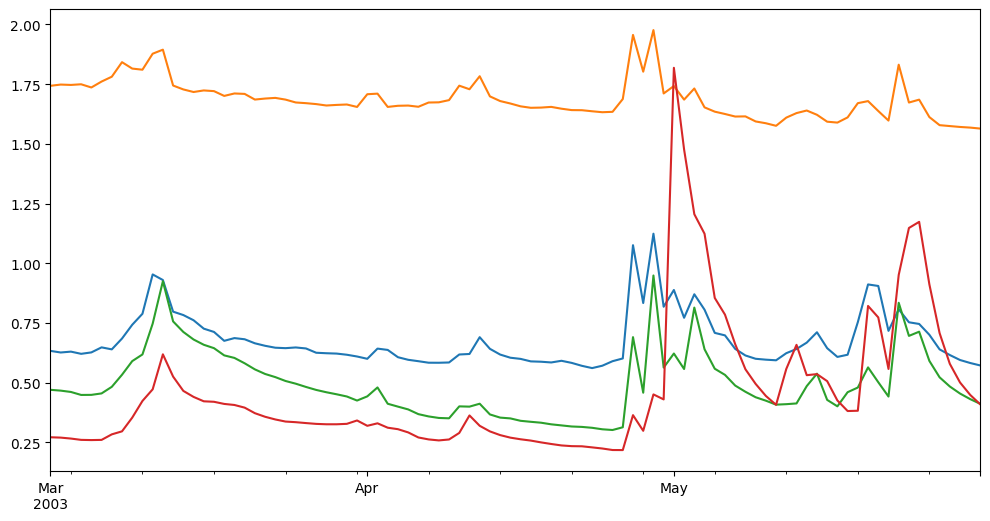

In [285]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

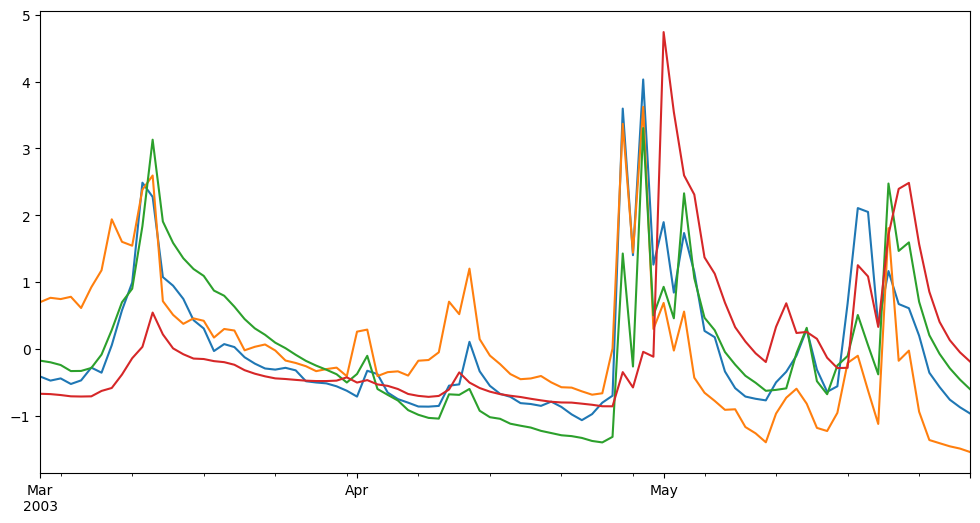

In [286]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

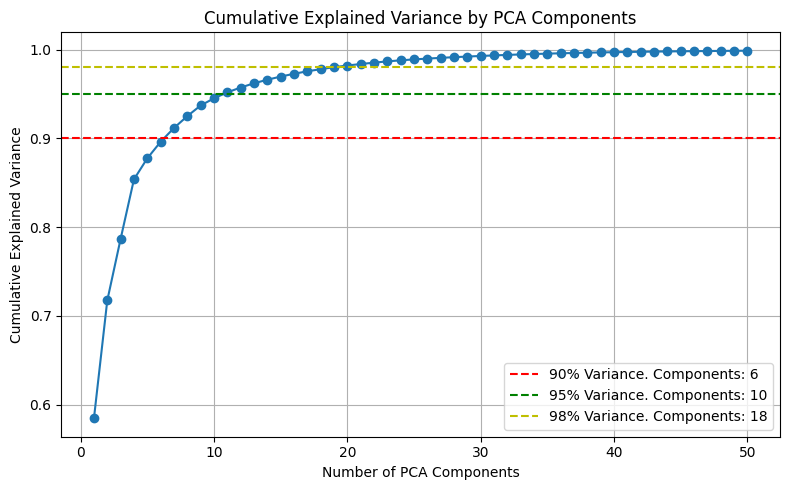

In [287]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [288]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-4.20774988e+00,  5.91653411e+00,  1.03628600e+00, ...,
        -7.23638711e-03,  4.38554971e-01, -4.25993263e-01],
       [-4.28400907e+00,  5.85625021e+00,  8.66692210e-01, ...,
        -8.52521877e-02,  2.74934234e-01, -3.91129128e-01],
       [-4.72691336e+00,  5.63270697e+00,  8.56045828e-01, ...,
         1.48780827e-01, -7.84919069e-02, -4.20280342e-01],
       ...,
       [-4.29644409e+00, -4.40011905e+00,  7.91381414e+00, ...,
         6.31999980e-01,  7.48410368e-01,  1.73854195e-01],
       [-7.27998519e+00, -4.12921592e+00,  6.83970815e+00, ...,
         9.71093897e-02,  1.30354111e+00, -2.47833828e-01],
       [-9.75620354e+00, -3.69501859e+00,  6.04862178e+00, ...,
         1.51315515e-01,  1.16505482e+00, -5.10253684e-01]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_56256\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


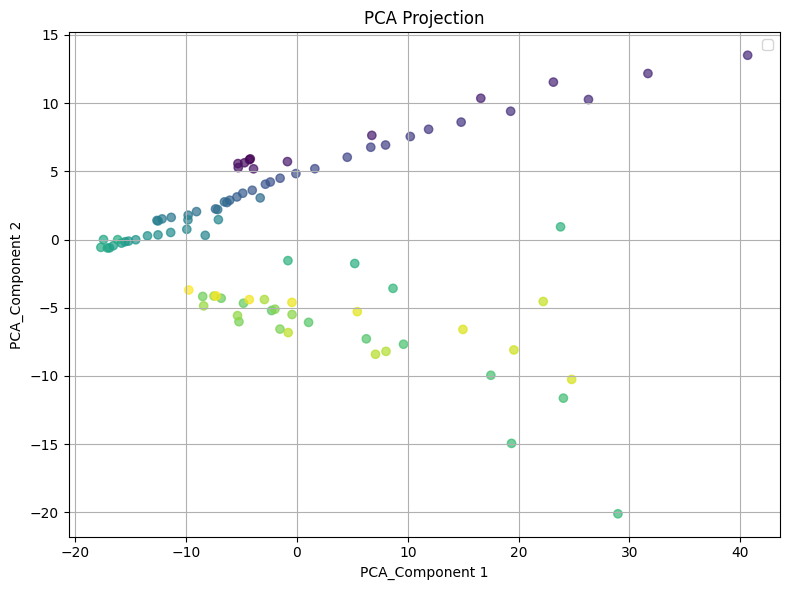

In [289]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_56256\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


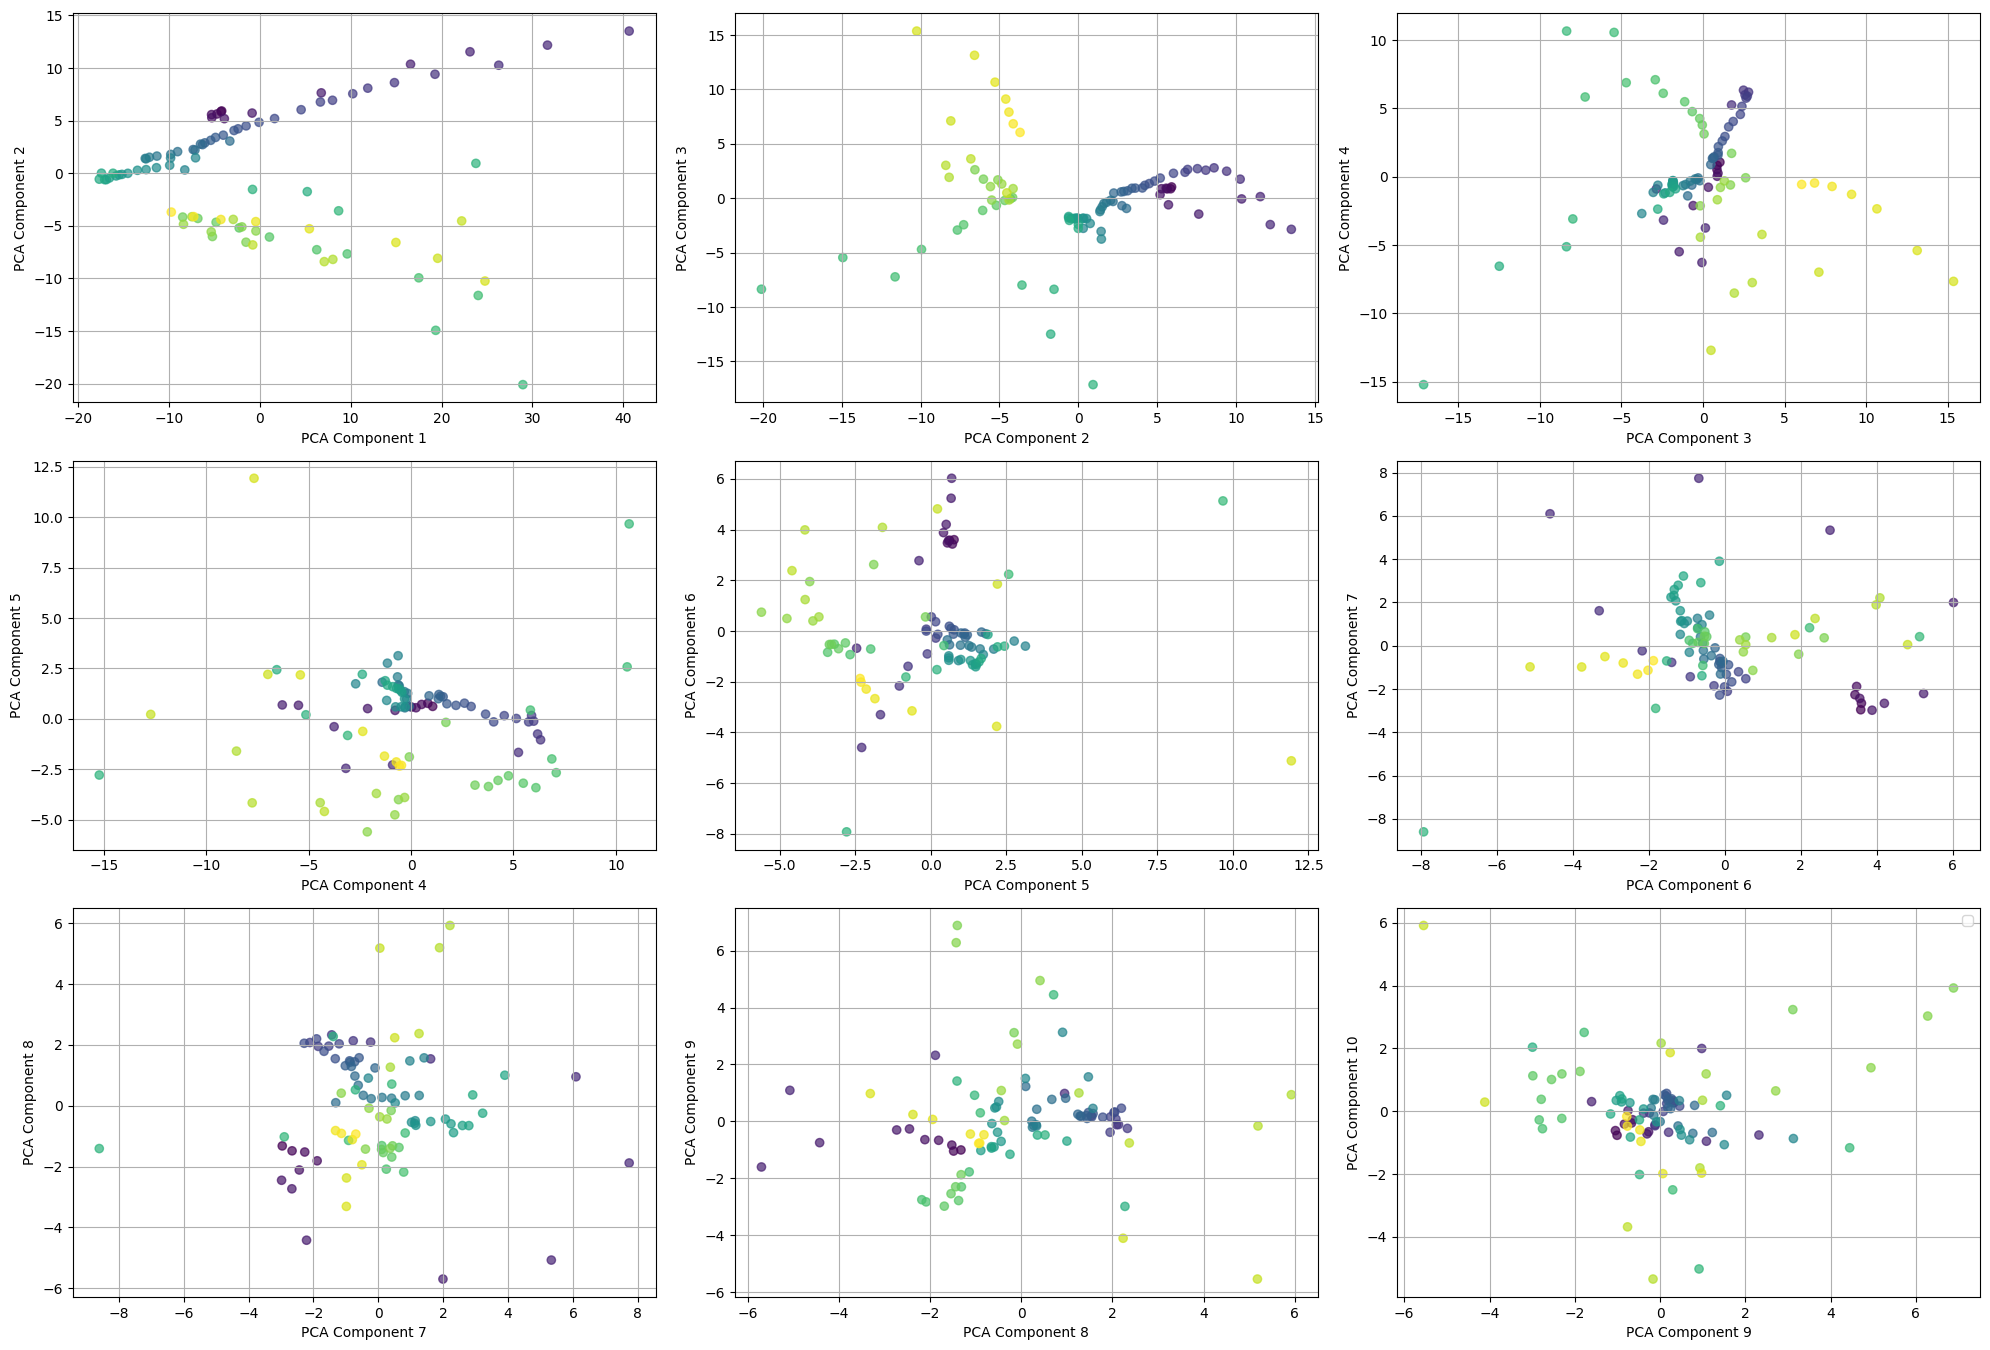

In [290]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [291]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.455
KMeans Davies-Bouldin Index is 1.242


<Axes: xlabel='k'>

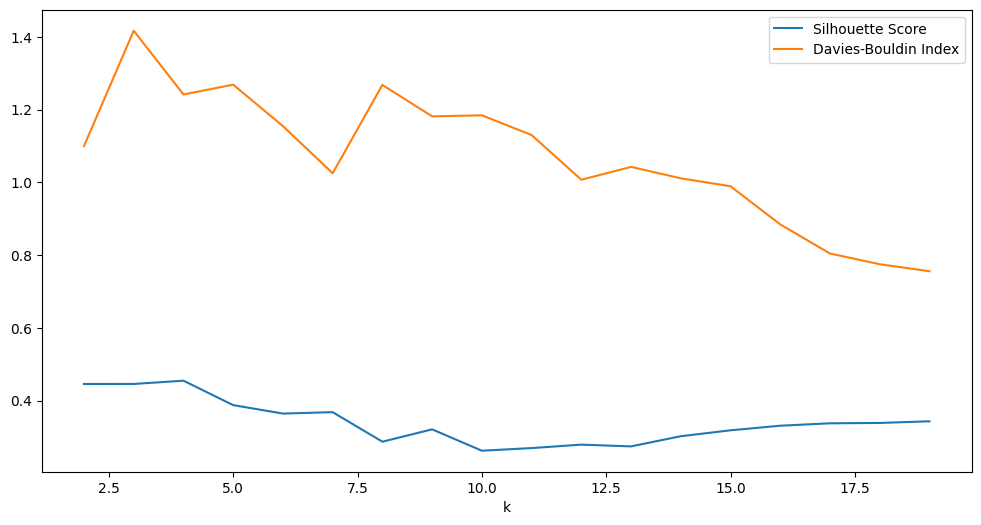

In [292]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         3     83         -0.264406   
3    1.27            3         4     78         -0.204068   
4    1.52            3         4     73         -0.129804   
5    1.78            3         5     62         -0.016625   
6    2.03            3         4     62         -0.026837   
7    2.29            3         4     60         -0.006763   
8    2.54            3         5     54          0.024278   
9    2.80            3         5     49          0.002908   
10   3.05            3         5     47          0.030603   
11   3.31            3         5     47          0.030603   
12   3.56            3         6     40          0.109661   
13   3.82            3         6     39          0.120052   
14   4.07            3         5     35          0.009874   
15   4.33            3         5     32          0.035620   
16   4.58            3         5     32          0.035620   
17   4.84            3         5     30          0.048023   
18   5.09            3         5     29          0.030601   
19   5.35            3         5     29          0.030601   
20   5.60            3         5     29          0.030601   
21   5.86            3         5     26          0.073967   
22   6.11            3         5     24          0.078312   
23   6.37            3         4     24          0.074983   
24   6.62            3         4     23          0.082187   
25   6.88            3         4     22          0.091758   
26   7.13            3         4     22          0.091758   
27   7.39            3         3     22          0.172476   
28   7.64            3         3     22          0.172476   
29   7.90            3         3     21          0.152432   
30   8.15            3         3     20          0.160009   
31   8.41            3         2     20          0.175188   
32   8.66            3         2     19          0.185153   
33   8.92            3         2     18          0.190255   
34   9.17            3         2     17          0.194639   
35   9.43            3         1     16               NaN   
36   9.68            3         1     16               NaN   
37   9.94            3         1     16               NaN   
38  10.19            3         1     14               NaN   
39  10.45            3         1     13               NaN   
40  10.70            3         1     13               NaN   
41  10.96            3         1     13               NaN   
42  11.21            3         1     13               NaN   
43  11.47            3         1     11               NaN   
44  11.72            3         1     10               NaN   
45  11.98            3         1      7               NaN   
46  12.23            3         1      6               NaN   
47  12.49            3         1      6               NaN   
48  12.74            3         1      6               NaN   
49  13.00            3         1      6               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               1.408181  
3               1.258859  
4               1.268483  
5               1.299175  
6               1.379803  
7               1.341491  
8               1.348670  
9               1.354403  
10              1.409423  
11              1.409423  
12              1.302107  
13              1.303348  
14              1.296219  
15              1.217099  
16              1.217099  
17              1.209331  
18              1.275312  
19              1.275312  
20              1.275312  
21              1.323608  
22              1.346288  
23              1.423194  
24              1.423719  
25              1.450629  
26              1.450629  
27              1.432134  
28              1.432134  
29              1.473836  
30              1.458640  
31              1.617333  
32 

<Axes: xlabel='eps'>

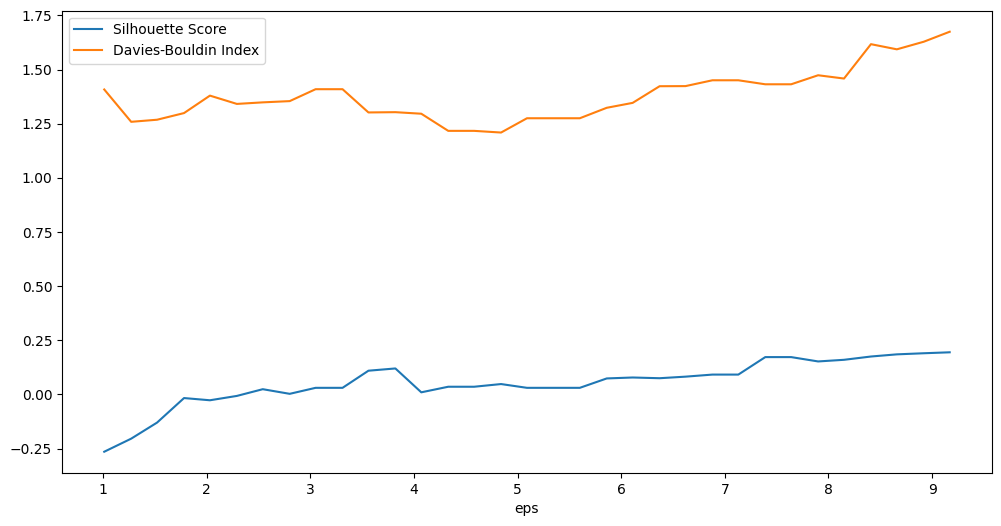

In [293]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

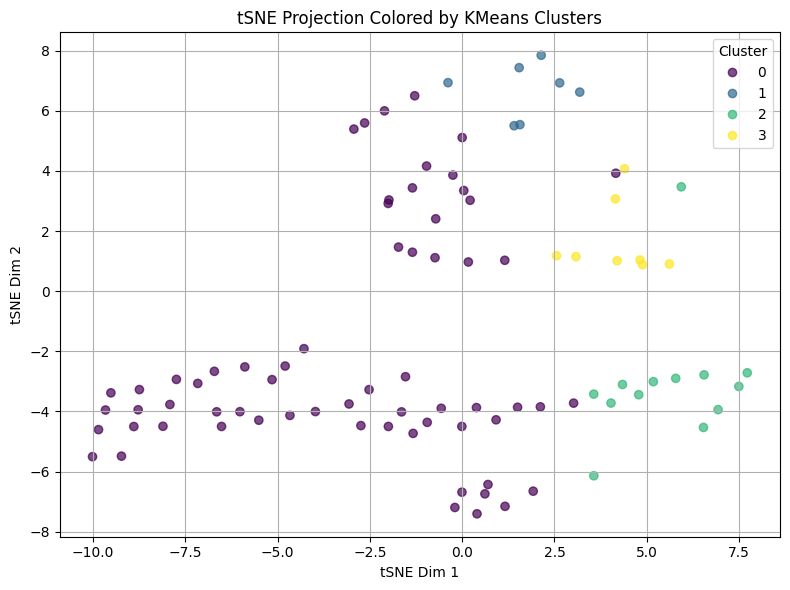

In [294]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        16     86          0.034318              0.543989
1   0.06            2        17     58         -0.006761              0.653449
2   0.07            2        13     41         -0.145863              0.653661
3   0.08            2         8     31          0.195127              0.509049
4   0.09            2         8     23          0.049101              0.838967
5   0.10            2         7     21          0.068187              0.729367
6   0.11            2         6     19         -0.000577              0.871452
7   0.11            2         3     16          0.295388              0.625680
8   0.12            2         3     15          0.295537              0.625182
9   0.13            2         2     14          0.328689              0.729194
10  0.14            2         2     13          0.321945              0.764769
11  0.15            2         2     11          0.321153              0.765384
12  0.16            2         2     10          0.319420              0.767107
13  0.17            2         2     10          0.319420              0.767107
14  0.18            2         1      9               NaN                   NaN
15  0.19            2         1      9               NaN                   NaN
16  0.20            2         1      8               NaN                   NaN
17  0.21            2         1      8               NaN                   NaN
18  0.22            2         1      8               NaN                   NaN
19  0.22            2         1      8               NaN                   NaN
20  0.23            2         1      8               NaN                   NaN
21  0.24            2         2      6          0.845880              0.159337
22  0.25            2         2      5          0.845325              0.159644
23  0.26            2         2      5          0.845325              0.159644
24  0.27            2         2      5          0.845325              0.159644
25  0.28            2         2      5          0.845325              0.159644
26  0.29            2         2      5          0.845325              0.159644
27  0.30            2         2      5          0.845325              0.159644
28  0.31            2         2      5          0.845325              0.159644
29  0.32            2         2      5          0.845325              0.159644
30  0.33            2         2      4          0.841248              0.161592
31  0.33            2         2      4          0.841248              0.161592
32  0.34            2         2      4          0.841248              0.161592
33  0.35            2         2      4          0.841248              0.161592
34  0.36            2         2      4          0.841248              0.161592
35  0.37            2         2      4          0.841248              0.161592
36  0.38            2         2      4          0.841248              0.161592
37  0.39            2         2      4          0.841248              0.161592
38  0.40            2         2      4          0.841248              0.161592
39  0.41            2         2      4          0.841248              0.161592
40  0.42            2         2      3          0.840199              0.162308
41  0.43            2         2      3          0.840199              0.162308
42  0.44            2         2      3          0.840199              0.162308
43  0.44            2         2      3          0.840199              0.162308
44  0.45            2         2      3          0.840199              0.162308
45  0.46            2         2      3          0.840199              0.162308
46  0.47            2         2      3          0.840199              0.162308
47  0.48            2         2      3          0.840199              0.162308
48  0.49            2         2      3          0.840199              0.162308
49  0.50            2         2      3          0.84019

<Axes: xlabel='eps'>

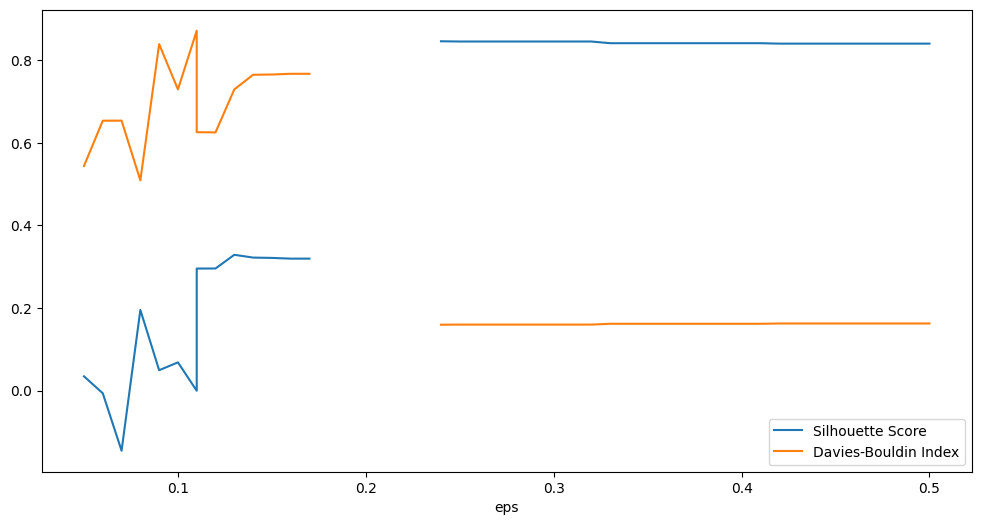

In [295]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 0.5, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [296]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [297]:
#Start with spring and work our way down to winter
season = 2
season_year = 2003
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2003-06-01 to 2003-08-31
Columns: 269 entries, 10000009 to 22000047
dtypes: float64(269)
memory usage: 194.1 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2003-06-01  0.775147  0.565054  0.421727  0.802200  0.500706  0.854665   
2003-06-02  0.751573  0.560315  0.403371  0.803662  0.479554  0.815960   
2003-06-03  0.758268  0.554471  0.398197  0.809604  0.492359  0.786478   
2003-06-04  0.771683  0.569542  0.398166  0.819828  0.490109  0.764820   
2003-06-05  0.801816  0.653125  0.391482  0.821303  0.511177  0.753110   
...              ...       ...       ...       ...       ...       ...   
2003-08-27  0.630052  0.475178  0.299856  0.686764  0.397848  0.355129   
2003-08-28  0.617712  0.491044  0.311899  0.658130  0.385086  0.345820   
2003-08-29  0.597433  0.487720  0.293912  0.633365  0.371314  0.344084   
2003-08-30  0.611297  0.466650  0.297023  0.628137  0.372828  0.346662   
2003-08-31  0.617584  0.453020  0.280299  0.629481  0.359581  0.346229   

            11000016  13000011  13000019  14000016  ...  63000007  66000014  \
2003-06-01  0.751641  0.417469  

          2003-06-01  2003-06-02  2003-06-03  2003-06-04  2003-06-05  \
10000009   -0.039460   -0.040860   -0.040210   -0.037832   -0.036076   
10000010   -0.058704   -0.057439   -0.057614   -0.055660   -0.049181   
10000011   -0.071833   -0.071043   -0.070960   -0.070774   -0.072241   
10000014   -0.036981   -0.036345   -0.035826   -0.033586   -0.034358   
10000016   -0.064599   -0.064440   -0.062919   -0.062665   -0.061692   
...              ...         ...         ...         ...         ...   
7000003    -0.059976   -0.062206   -0.064251   -0.065054   -0.066367   
8000001    -0.050787   -0.053327   -0.055423   -0.054234   -0.057314   
9000001    -0.002030   -0.004404   -0.006441   -0.003404   -0.002837   
9000015    -0.003748   -0.005943   -0.007822   -0.004893   -0.004453   
22000047   -0.048826   -0.048098   -0.048187   -0.047678   -0.042909   

          2003-06-06  2003-06-07  2003-06-08  2003-06-09  2003-06-10  ...  \
10000009   -0.038326   -0.041591   -0.046167   -0.043385  

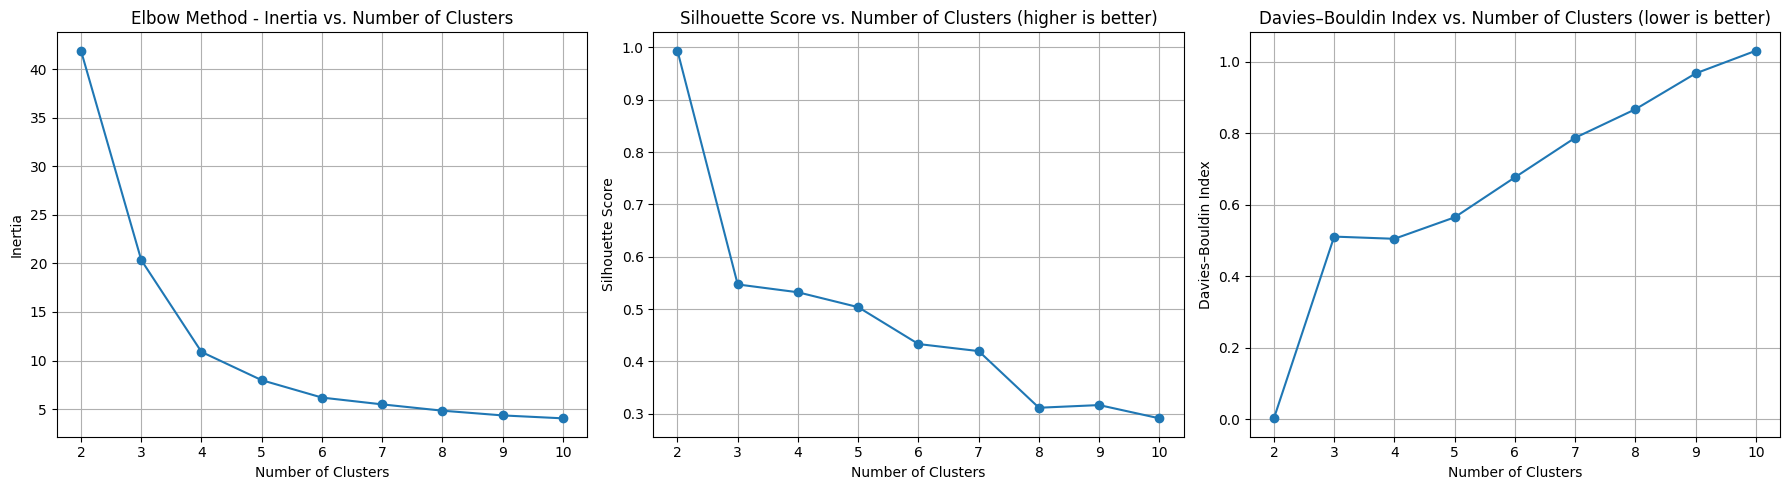

In [298]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        0
10000011        0
10000014        2
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2003-06-01  0.775147  0.565054  0.421727  0.802200  0.500706  0.854665   
2003-06-02  0.751573  0.560315  0.403371  0.803662  0.479554  0.815960   
2003-06-03  0.758268  0.554471  0.398197  0.809604  0.492359  0.786478   
2003-06-04  0.771683  0.569542  0.398166  0.819828  0.490109  0.764820   
2003-06-05  0.801816  0.653125  0.391482  0.821303  0.511177  0.753110   
...              ...       ...       ...       ...       ...       ...   
2003-08-27  0.630052  0.475178  0.299856  0.686764  0.397848  0.355129   
2003-08-28  0.617712  0.491044  0.311899  0.658130  0.385086  0.345820   
2003-08-29  0.597433  0.487720  0.293912  0.633365  0.371314  0.344084   
2003-08-30  0.611297  0.466650  0.297023  0.628137  0.372828  0.346662   
2003-08-31  0.617584  0.453020  0.280299  0.629481  0.359581  0.346229   

            11000016  13000011  13000019  14000016  ...  63000007  66000014  \
2003-06-01  0.751641  0.417469  

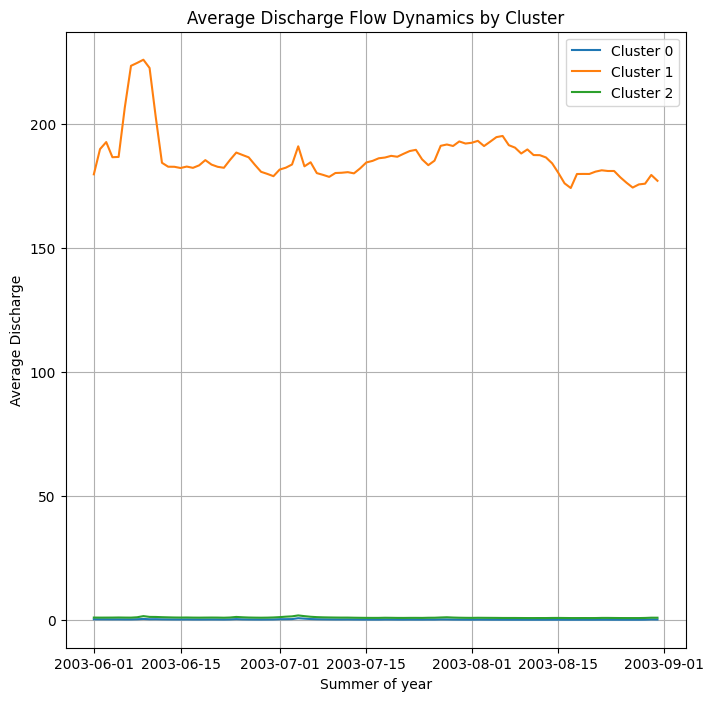

In [299]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [300]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [301]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2003-06-01  0.775147  0.565054  0.421727  0.802200  0.500706  0.854665   
2003-06-02  0.751573  0.560315  0.403371  0.803662  0.479554  0.815960   
2003-06-03  0.758268  0.554471  0.398197  0.809604  0.492359  0.786478   
2003-06-04  0.771683  0.569542  0.398166  0.819828  0.490109  0.764820   
2003-06-05  0.801816  0.653125  0.391482  0.821303  0.511177  0.753110   
...              ...       ...       ...       ...       ...       ...   
2003-08-27  0.630052  0.475178  0.299856  0.686764  0.397848  0.355129   
2003-08-28  0.617712  0.491044  0.311899  0.658130  0.385086  0.345820   
2003-08-29  0.597433  0.487720  0.293912  0.633365  0.371314  0.344084   
2003-08-30  0.611297  0.466650  0.297023  0.628137  0.372828  0.346662   
2003-08-31  0.617584  0.453020  0.280299  0.629481  0.359581  0.346229   

            11000016  13000011  13000019  14000016  ...  63000007  66000014  \
2003-06-01  0.751641  0.417469  0.662085  0.888147  ...  0.093332  0.088885   
2003-06-02  0.729999  0.394344  0.627733  0.884849  ...  0.082798  0.079194   
2003-06-03  0.712420  0.395628  0.629643  0.878577  ...  0.075845  0.072448   
2003-06-04  0.708701  0.388978  0.619767  0.879699  ...  0.068261  0.062124   
2003-06-05  0.732772  0.412557  0.654788  0.904809  ...  0.064258  0.049203   
...              ...       ...       ...       ...  ...       ...       ...   
2003-08-27  0.497552  0.350058  0.573749  0.803161  ...  0.028231  0.015050   
2003-08-28  0.498098  0.356784  0.565003  0.885542  ...  0.029495  0.014460   
2003-08-29  0.494295  0.362149  0.558806  0.854795  ...  0.031602  0.031401   
2003-08-30  0.508480  0.379909  0.589257  0.795009  ...  0.039187  0.036707   
2003-08-31  0.505716  0.364341  0.598627  0.767401  ...  0.035184  0.034289   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2003-06-01  0.056471  0.085463  0.104500  0.551168  0.651489  1.183755   
2003-06-02  0.049990  0.079598  0.091134  0.505324  0.607754  1.172134   
2003-06-03  0.046219  0.070586  0.074648  0.476756  0.580131  1.153696   
2003-06-04  0.041747  0.060520  0.069925  0.463026  0.585704  1.162065   
2003-06-05  0.037537  0.051458  0.066791  0.458127  0.560850  1.178941   
...              ...       ...       ...       ...       ...       ...   
2003-08-27  0.010328  0.005968  0.007573  0.242126  0.296006  0.754546   
2003-08-28  0.009917  0.004888  0.007573  0.239064  0.292664  0.766943   
2003-08-29  0.012396  0.021928  0.037866  0.231648  0.291950  0.759291   
2003-08-30  0.031295  0.129516  0.082042  0.234750  0.301916  0.759525   
2003-08-31  0.015662  0.073424  0.050487  0.228507  0.305989  0.764726   

             9000015  22000047  
2003-06-01  1.165008  0.672892  
2003-06-02  1.154383  0.668074  
2003-06-03  1.137527  0.664862  
2003-06-04  1.145177  0.660044  
2003-06-05  1.160606  0.724282  
...              ...       ...  
2003-08-27  0.772601  0.533174  
2003-08-28  0.783936  0.549234  
2003-08-29  0.776940  0.576535  
2003-08-30  0.777154  0.735524  
2003-08-31  0.781908  0.611866  

[92 rows x 269 columns]

<Axes: >

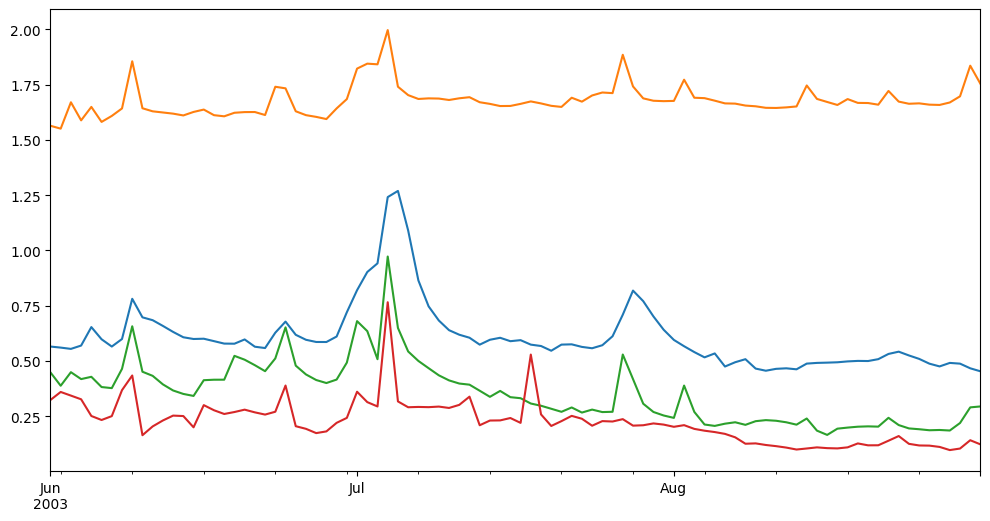

In [302]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

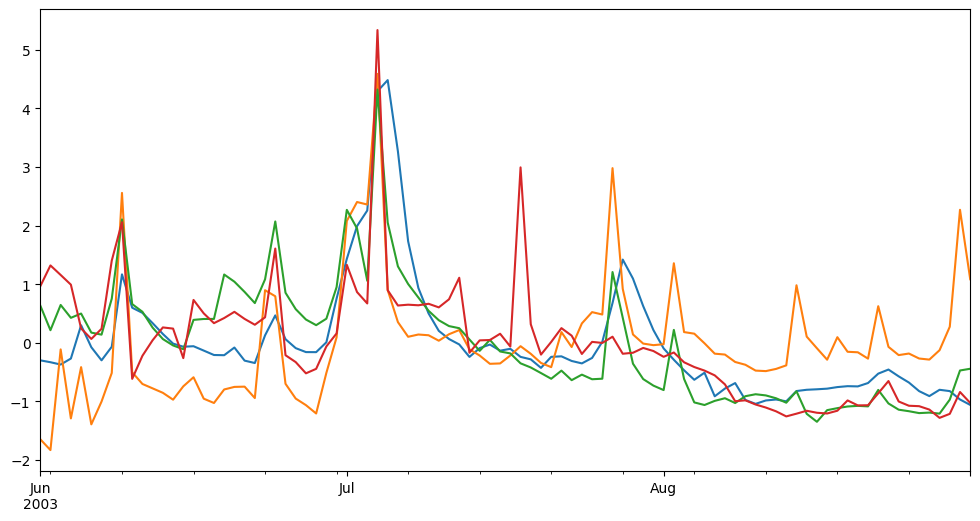

In [303]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

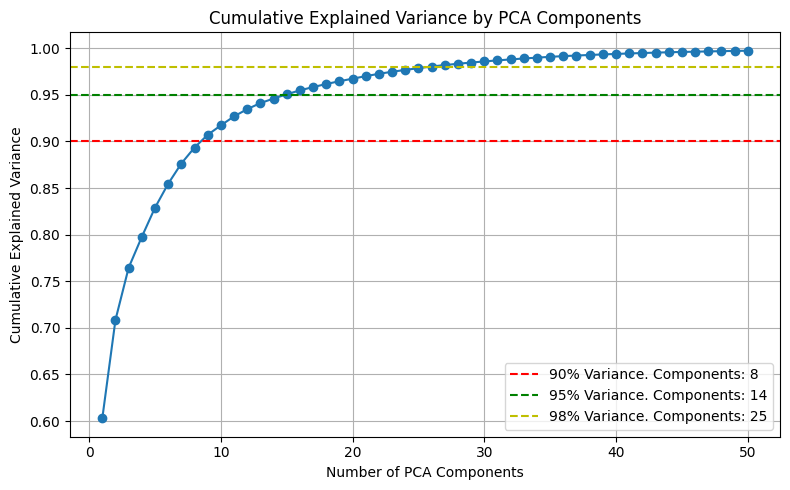

In [304]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [305]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 13.31030444,  13.59089206,  -2.48991456, ...,   1.46866278,
          0.91203838,  -0.38344664],
       [ 10.32142202,  12.34107577,  -1.93354653, ...,   0.79522469,
          0.27279814,  -0.17129657],
       [  9.30256428,   9.92398205,  -0.11593321, ...,   0.22330054,
          0.1350457 ,   0.31805691],
       ...,
       [-10.98004444,  -5.13220446,   2.93818846, ...,  -2.01644992,
          0.99319672,  -0.45629414],
       [ -0.87989545,  -5.59042283,   8.64178015, ...,   0.95564574,
         -0.65024733,  -0.10953796],
       [ -2.31635239,  -3.35312907,   3.99587566, ...,  -0.30547932,
         -0.25197014,  -0.31919957]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_56256\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


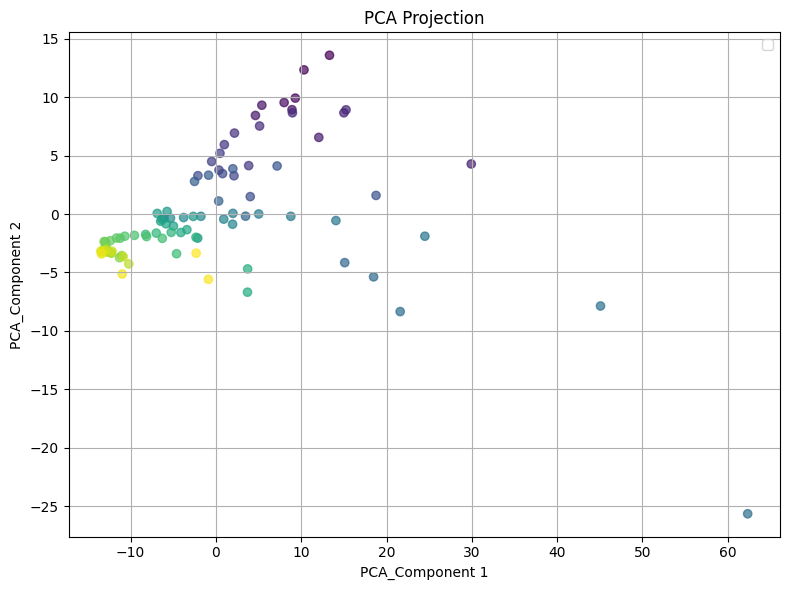

In [306]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_56256\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


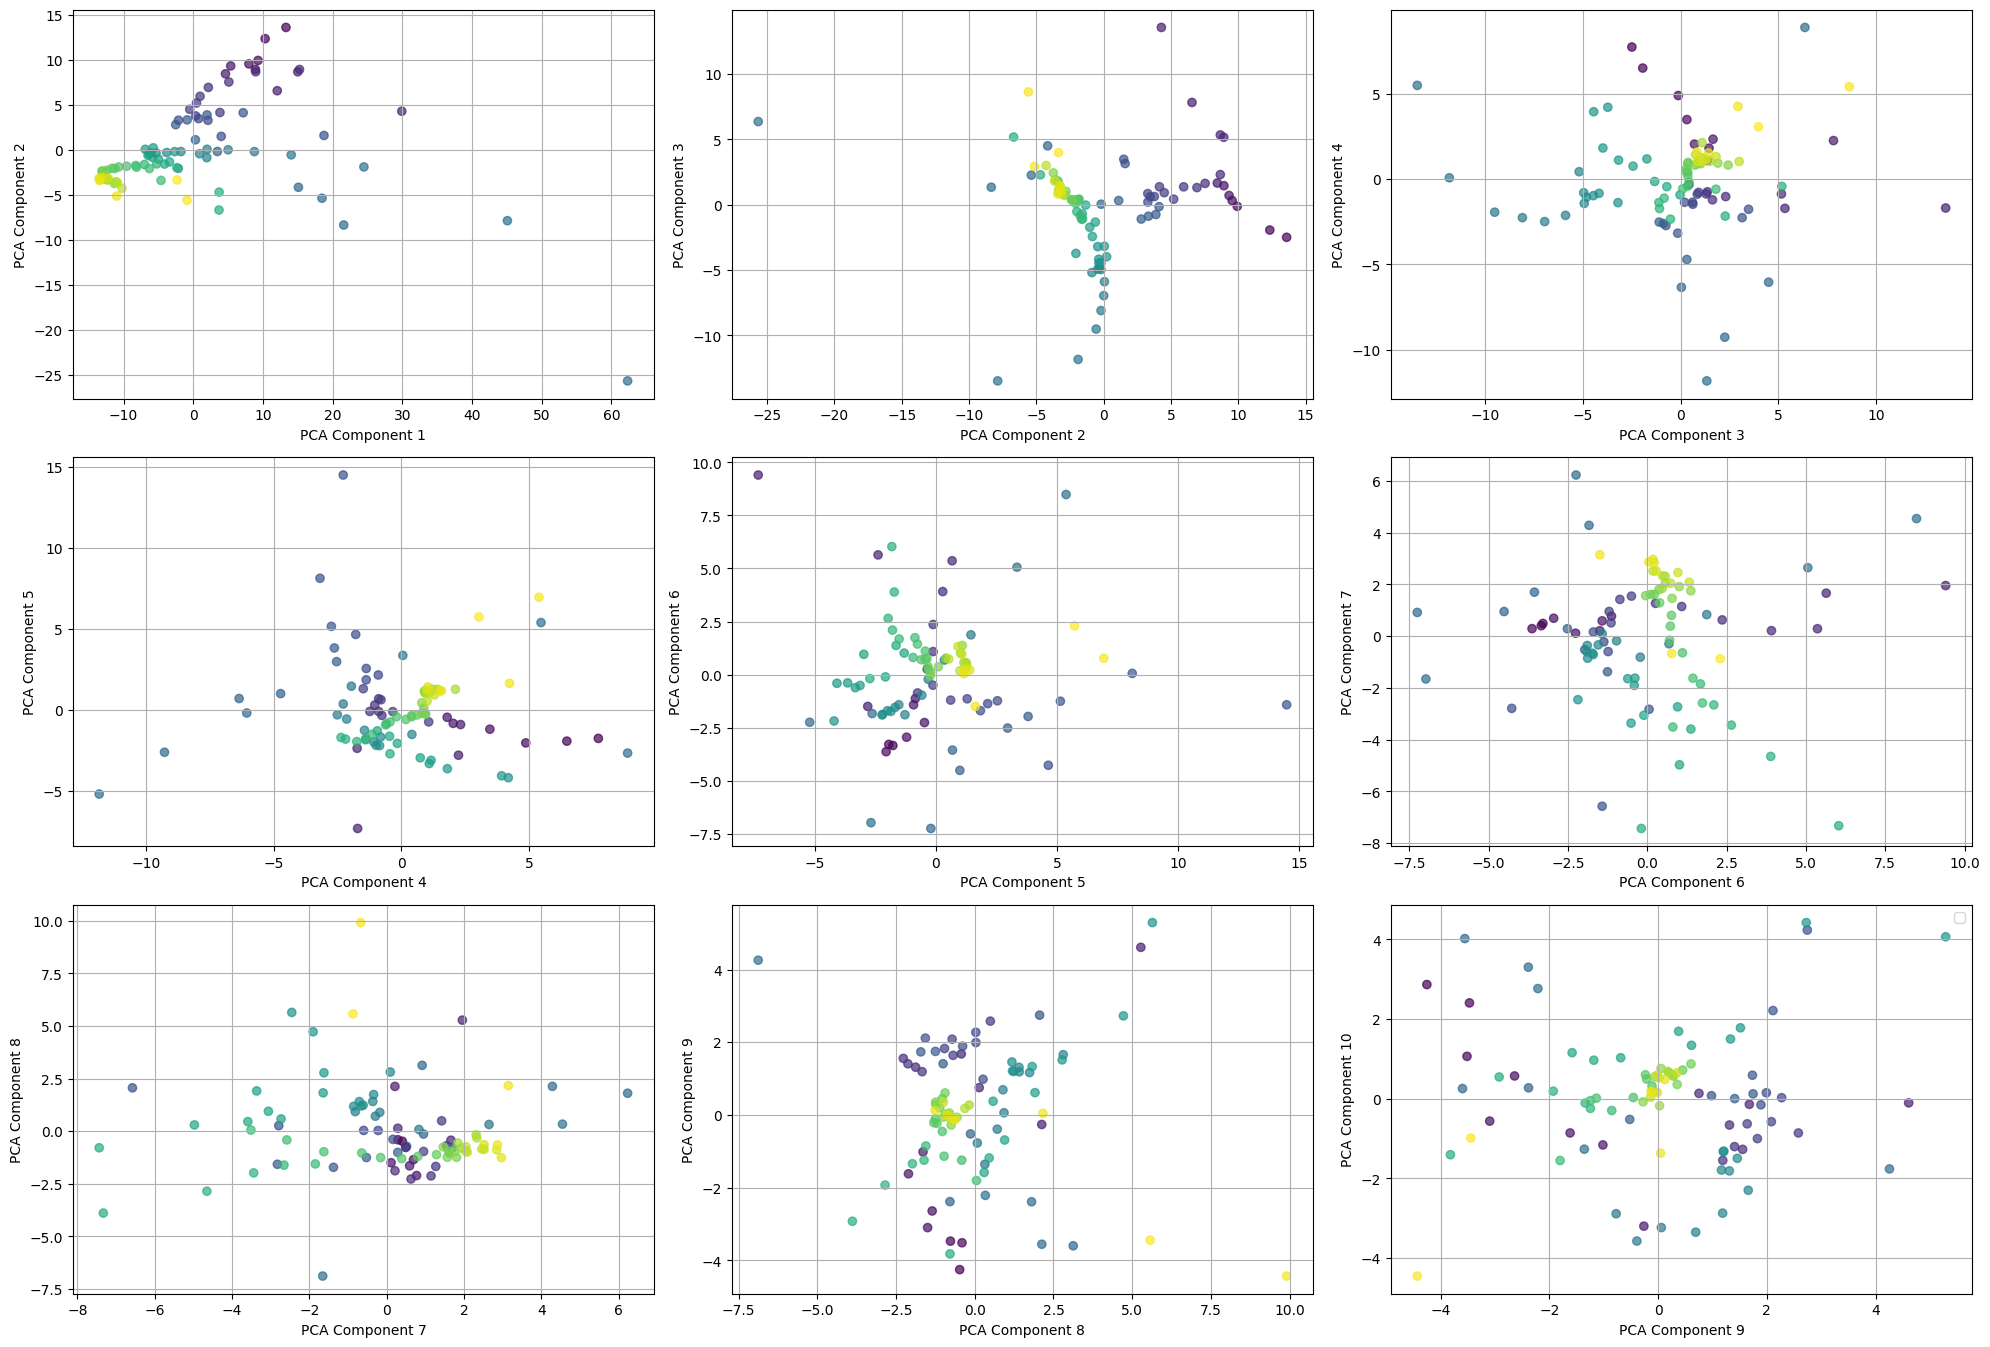

In [307]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [308]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.312
KMeans Davies-Bouldin Index is 1.329


<Axes: xlabel='k'>

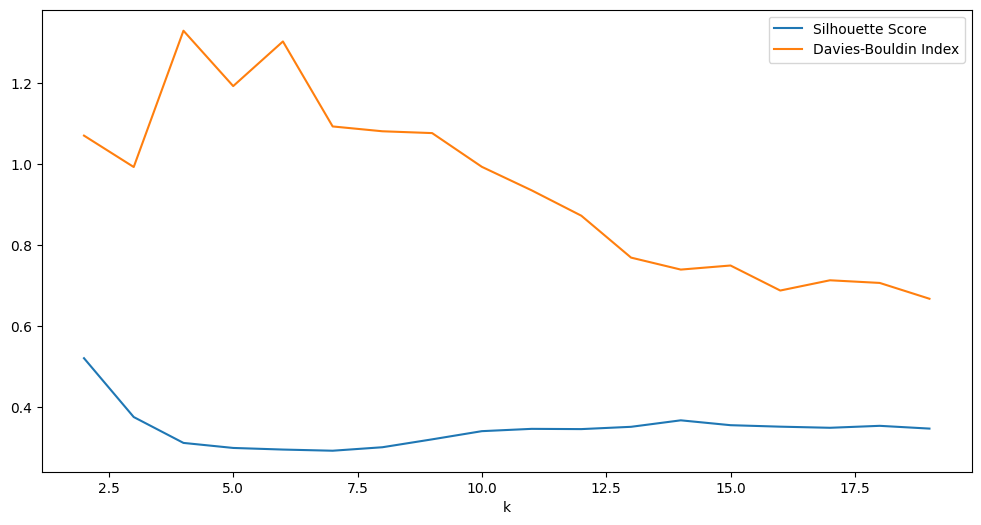

In [309]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         1     89               NaN   
3    1.27            3         3     83         -0.134768   
4    1.52            3         4     73         -0.131000   
5    1.78            3         3     71         -0.083772   
6    2.03            3         3     67         -0.042769   
7    2.29            3         2     65          0.039471   
8    2.54            3         3     59         -0.004494   
9    2.80            3         4     56         -0.014014   
10   3.05            3         4     53          0.005648   
11   3.31            3         3     51          0.044444   
12   3.56            3         5     40          0.094105   
13   3.82            3         6     33          0.120871   
14   4.07            3         6     32          0.117244   
15   4.33            3         6     30          0.146669   
16   4.58            3         5     29          0.166565   
17   4.84            3         5     24          0.200216   
18   5.09            3         5     23          0.208871   
19   5.35            3         5     23          0.208871   
20   5.60            3         4     23          0.230340   
21   5.86            3         3     22          0.205888   
22   6.11            3         3     22          0.205888   
23   6.37            3         3     21          0.194279   
24   6.62            3         3     21          0.194279   
25   6.88            3         3     20          0.206113   
26   7.13            3         3     20          0.206113   
27   7.39            3         2     20          0.252297   
28   7.64            3         2     20          0.252297   
29   7.90            3         2     16          0.267791   
30   8.15            3         2     13          0.295788   
31   8.41            3         2     13          0.295788   
32   8.66            3         2     12          0.294976   
33   8.92            3         1     12               NaN   
34   9.17            3         1     12               NaN   
35   9.43            3         1     12               NaN   
36   9.68            3         1     12               NaN   
37   9.94            3         1     12               NaN   
38  10.19            3         1     12               NaN   
39  10.45            3         1     11               NaN   
40  10.70            3         1     11               NaN   
41  10.96            3         1     11               NaN   
42  11.21            3         1     11               NaN   
43  11.47            3         1     11               NaN   
44  11.72            3         1     11               NaN   
45  11.98            3         1     11               NaN   
46  12.23            3         1      9               NaN   
47  12.49            3         1      9               NaN   
48  12.74            3         1      9               NaN   
49  13.00            3         1      9               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.013570  
4               1.086957  
5               1.118269  
6               1.120949  
7               1.173020  
8               1.605251  
9               1.465084  
10              1.544013  
11              1.708726  
12              1.494424  
13              1.550711  
14              1.533868  
15              1.494923  
16              1.537923  
17              1.513734  
18              1.505564  
19              1.505564  
20              1.556088  
21              1.574736  
22              1.574736  
23              1.598720  
24              1.598720  
25              1.617699  
26              1.617699  
27              1.787602  
28              1.787602  
29              1.597270  
30              1.479397  
31              1.479397  
32 

<Axes: xlabel='eps'>

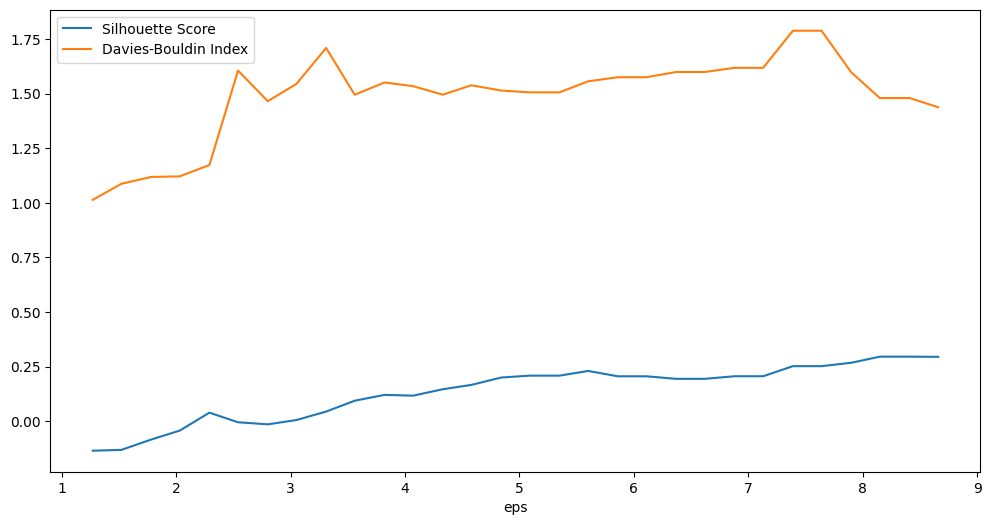

In [310]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

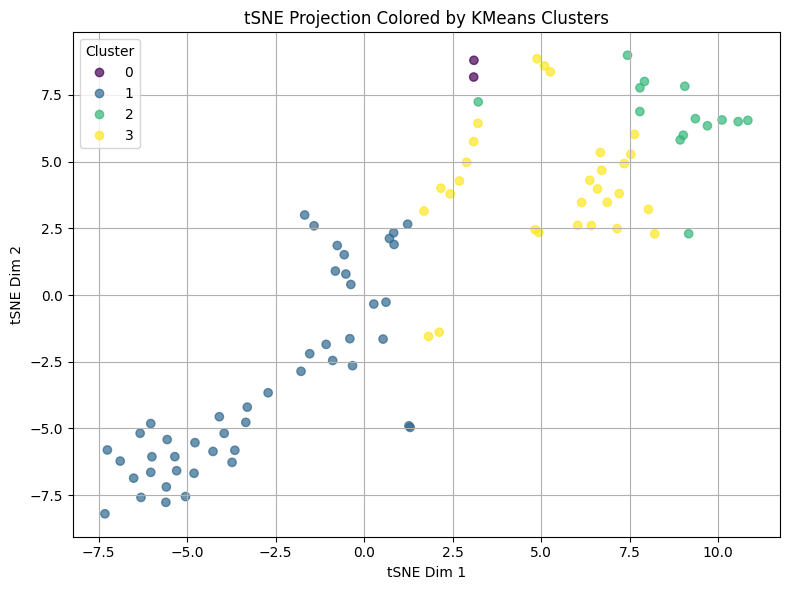

In [311]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        15     76          0.154924              0.654987
1   0.07            2         8     44         -0.001386              0.695817
2   0.09            2         9     30          0.369526              0.449775
3   0.11            2         5     19          0.312974              0.425280
4   0.13            2         4     18          0.329711              0.419603
5   0.15            2         4     15          0.459320              0.277099
6   0.17            2         4     13          0.453813              0.280232
7   0.19            2         4      8          0.379464              0.431147
8   0.21            2         4      7          0.377118              0.432278
9   0.22            2         4      7          0.377118              0.432278
10  0.24            2         4      7          0.377118              0.432278
11  0.26            2         2      7          0.828794              0.150176
12  0.28            2         2      4          0.817827              0.155578
13  0.30            2         2      3          0.815223              0.157118
14  0.32            2         2      2          0.807363              0.206830
15  0.34            2         2      1          0.806710              0.207332
16  0.36            2         2      1          0.806710              0.207332
17  0.38            2         2      1          0.806710              0.207332
18  0.40            2         2      1          0.806710              0.207332
19  0.42            2         2      1          0.806710              0.207332
20  0.44            2         2      1          0.806710              0.207332
21  0.46            2         2      1          0.806710              0.207332
22  0.48            2         2      1          0.806710              0.207332
23  0.50            2         2      1          0.806710              0.207332
24  0.52            2         2      1          0.806710              0.207332
25  0.53            2         2      1          0.806710              0.207332
26  0.55            2         2      1          0.806710              0.207332
27  0.57            2         2      1          0.806710              0.207332
28  0.59            2         2      1          0.806710              0.207332
29  0.61            2         2      1          0.806710              0.207332
30  0.63            2         2      1          0.806710              0.207332
31  0.65            2         2      1          0.806710              0.207332
32  0.67            2         2      1          0.806710              0.207332
33  0.69            2         2      1          0.806710              0.207332
34  0.71            2         2      1          0.806710              0.207332
35  0.73            2         2      1          0.806710              0.207332
36  0.75            2         2      1          0.806710              0.207332
37  0.77            2         2      1          0.806710              0.207332
38  0.79            2         2      1          0.806710              0.207332
39  0.81            2         2      1          0.806710              0.207332
40  0.83            2         2      1          0.806710              0.207332
41  0.84            2         1      1               NaN                   NaN
42  0.86            2         1      1               NaN                   NaN
43  0.88            2         1      1               NaN                   NaN
44  0.90            2         1      1               NaN                   NaN
45  0.92            2         1      1               NaN                   NaN
46  0.94            2         1      1               NaN                   NaN
47  0.96            2         1      1               NaN                   NaN
48  0.98            2         1      1               NaN                   NaN
49  1.00            2         1      1               Na

<Axes: xlabel='eps'>

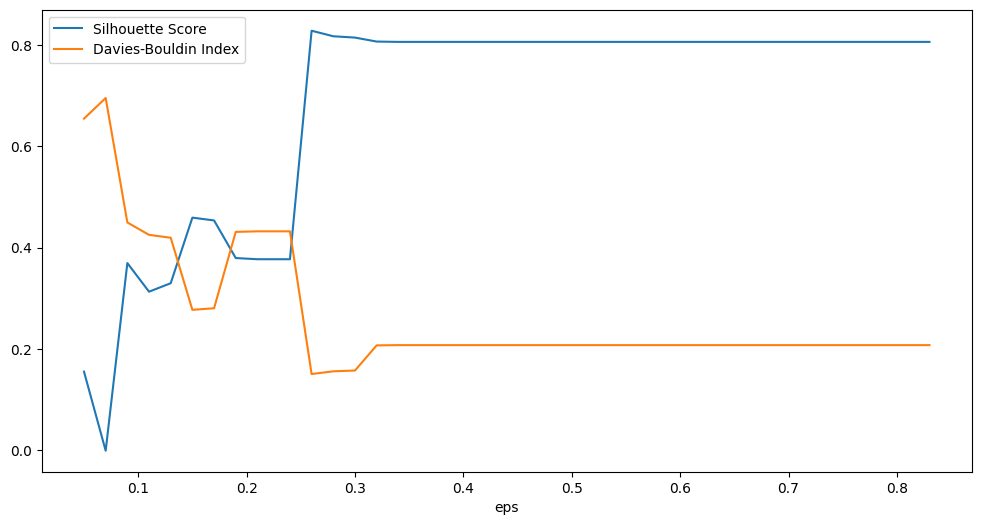

In [312]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [313]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [314]:
#Start with spring and work our way down to winter
season = 3
season_year = 2003
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2003-09-01 to 2003-11-30
Columns: 272 entries, 10000009 to 22000047
dtypes: float64(272)
memory usage: 194.1 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2003-09-01  0.604522  0.478268  0.298717  0.670665  0.365195  0.352171   
2003-09-02  0.592622  0.467573  0.296622  0.661593  0.354998  0.345869   
2003-09-03  0.680890  0.443913  0.290185  0.923816  0.357353  0.342413   
2003-09-04  0.592358  0.426788  0.286028  0.890710  0.340637  0.345945   
2003-09-05  0.573242  0.414789  0.296130  0.731019  0.341983  0.344132   
...              ...       ...       ...       ...       ...       ...   
2003-11-26  1.018652  0.612711  0.538207  0.907696  0.470324  1.012804   
2003-11-27  0.950928  0.598494  0.479936  0.863993  0.455522  1.022922   
2003-11-28  0.920209  0.592365  0.438019  0.868672  0.447994  1.015667   
2003-11-29  0.865355  0.568256  0.403556  0.847577  0.424908  0.988157   
2003-11-30  0.847762  0.565097  0.389327  0.828472  0.423352  0.970846   

            11000016  13000011  13000019  14000016  ...  63000007  66000014  \
2003-09-01  0.547481  0.355574  

          2003-09-01  2003-09-02  2003-09-03  2003-09-04  2003-09-05  \
10000009   -0.044405   -0.043107   -0.033281   -0.040252   -0.040898   
10000010   -0.056055   -0.054773   -0.055389   -0.055799   -0.056078   
10000011   -0.072624   -0.070721   -0.069730   -0.069017   -0.067446   
10000014   -0.038301   -0.036672   -0.010618   -0.012236   -0.025782   
10000016   -0.066489   -0.065275   -0.063464   -0.063889   -0.063053   
...              ...         ...         ...         ...         ...   
7000003    -0.076504   -0.070701   -0.071180   -0.072651   -0.073580   
8000001    -0.072049   -0.069521   -0.067620   -0.066764   -0.066535   
9000001    -0.029623   -0.027945   -0.026259   -0.023455   -0.022529   
9000015    -0.028037   -0.026265   -0.024588   -0.021894   -0.020885   
22000047   -0.039133   -0.043708   -0.043615   -0.042944   -0.041967   

          2003-09-06  2003-09-07  2003-09-08  2003-09-09  2003-09-10  ...  \
10000009   -0.039321   -0.042031   -0.041138   -0.039410  

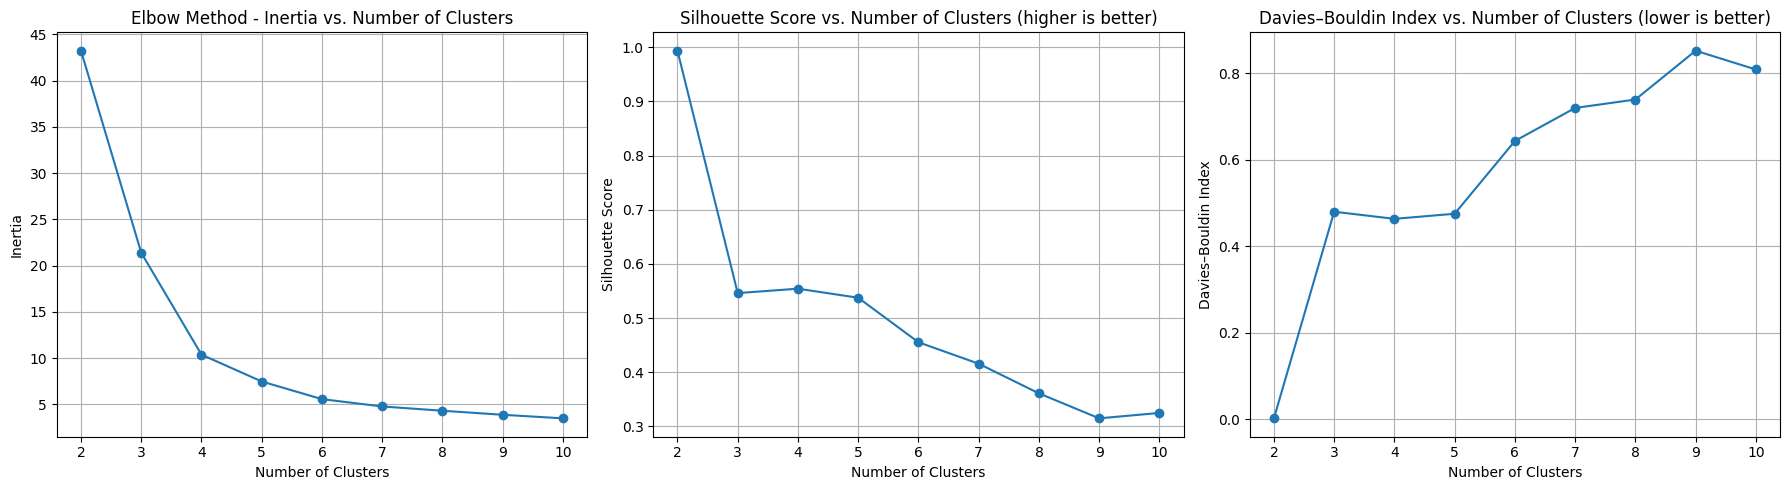

In [315]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        0
10000011        0
10000014        2
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2003-09-01  0.604522  0.478268  0.298717  0.670665  0.365195  0.352171   
2003-09-02  0.592622  0.467573  0.296622  0.661593  0.354998  0.345869   
2003-09-03  0.680890  0.443913  0.290185  0.923816  0.357353  0.342413   
2003-09-04  0.592358  0.426788  0.286028  0.890710  0.340637  0.345945   
2003-09-05  0.573242  0.414789  0.296130  0.731019  0.341983  0.344132   
...              ...       ...       ...       ...       ...       ...   
2003-11-26  1.018652  0.612711  0.538207  0.907696  0.470324  1.012804   
2003-11-27  0.950928  0.598494  0.479936  0.863993  0.455522  1.022922   
2003-11-28  0.920209  0.592365  0.438019  0.868672  0.447994  1.015667   
2003-11-29  0.865355  0.568256  0.403556  0.847577  0.424908  0.988157   
2003-11-30  0.847762  0.565097  0.389327  0.828472  0.423352  0.970846   

            11000016  13000011  13000019  14000016  ...  63000007  66000014  \
2003-09-01  0.547481  0.355574  

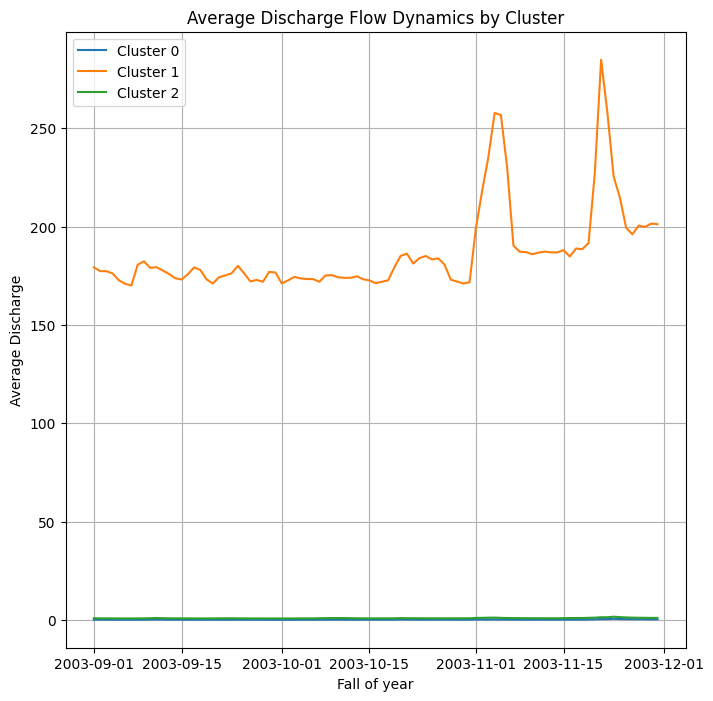

In [316]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [317]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [318]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2003-09-01  0.604522  0.478268  0.298717  0.670665  0.365195  0.352171   
2003-09-02  0.592622  0.467573  0.296622  0.661593  0.354998  0.345869   
2003-09-03  0.680890  0.443913  0.290185  0.923816  0.357353  0.342413   
2003-09-04  0.592358  0.426788  0.286028  0.890710  0.340637  0.345945   
2003-09-05  0.573242  0.414789  0.296130  0.731019  0.341983  0.344132   
...              ...       ...       ...       ...       ...       ...   
2003-11-26  1.018652  0.612711  0.538207  0.907696  0.470324  1.012804   
2003-11-27  0.950928  0.598494  0.479936  0.863993  0.455522  1.022922   
2003-11-28  0.920209  0.592365  0.438019  0.868672  0.447994  1.015667   
2003-11-29  0.865355  0.568256  0.403556  0.847577  0.424908  0.988157   
2003-11-30  0.847762  0.565097  0.389327  0.828472  0.423352  0.970846   

            11000016  13000011  13000019  14000016  ...  63000007  66000014  \
2003-09-01  0.547481  0.355574  0.592147  0.760555  ...  0.031391  0.041795   
2003-09-02  0.507324  0.353383  0.585846  0.765899  ...  0.026967  0.044247   
2003-09-03  0.500480  0.351796  0.580682  0.758744  ...  0.025071  0.029541   
2003-09-04  0.491697  0.346279  0.573006  0.749500  ...  0.024228  0.024864   
2003-09-05  0.497713  0.339780  0.563650  0.734133  ...  0.023175  0.021875   
...              ...       ...       ...       ...  ...       ...       ...   
2003-11-26  1.050500  0.630058  0.933158  1.017059  ...  0.116085  0.764510   
2003-11-27  0.911594  0.598468  0.897171  0.960937  ...  0.108501  1.362498   
2003-11-28  0.835053  0.573982  0.892616  0.927702  ...  0.094385  1.203817   
2003-11-29  0.780805  0.542846  0.844450  0.889445  ...  0.081533  0.908028   
2003-11-30  0.912639  0.539370  0.847943  0.866934  ...  0.074370  0.756504   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2003-09-01  0.018116  0.069119  0.056798  0.256670  0.304950  0.764709   
2003-09-02  0.023793  0.110407  0.063109  0.296840  0.309489  0.755140   
2003-09-03  0.018807  0.066381  0.056798  0.274642  0.312810  0.756150   
2003-09-04  0.016492  0.039249  0.050487  0.247330  0.310023  0.771233   
2003-09-05  0.018028  0.029686  0.050487  0.232098  0.305641  0.764970   
...              ...       ...       ...       ...       ...       ...   
2003-11-26  1.137042  1.483996  1.586898  1.062952  1.455398  1.278072   
2003-11-27  3.138061  4.142773  2.512678  0.937729  1.305260  1.260201   
2003-11-28  2.437838  3.212378  2.273309  0.853363  1.223278  1.175819   
2003-11-29  1.595934  2.093732  1.977413  0.766759  1.110167  1.173105   
2003-11-30  1.283220  1.678225  1.814288  0.729062  1.047051  1.199828   

             9000015  22000047  
2003-09-01  0.781893  0.661650  
2003-09-02  0.773145  0.586171  
2003-09-03  0.774068  0.570111  
2003-09-04  0.787858  0.563687  
2003-09-05  0.782132  0.562081  
...              ...       ...  
2003-11-26  1.251238  0.953932  
2003-11-27  1.234898  0.963568  
2003-11-28  1.157752  0.978022  
2003-11-29  1.155271  0.986051  
2003-11-30  1.179703  1.125769  

[91 rows x 272 columns]

<Axes: >

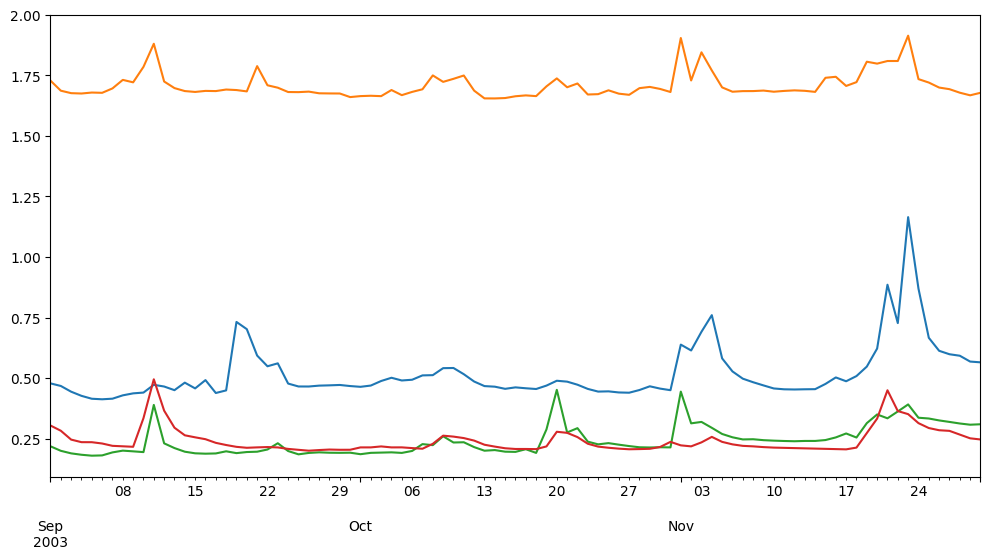

In [319]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

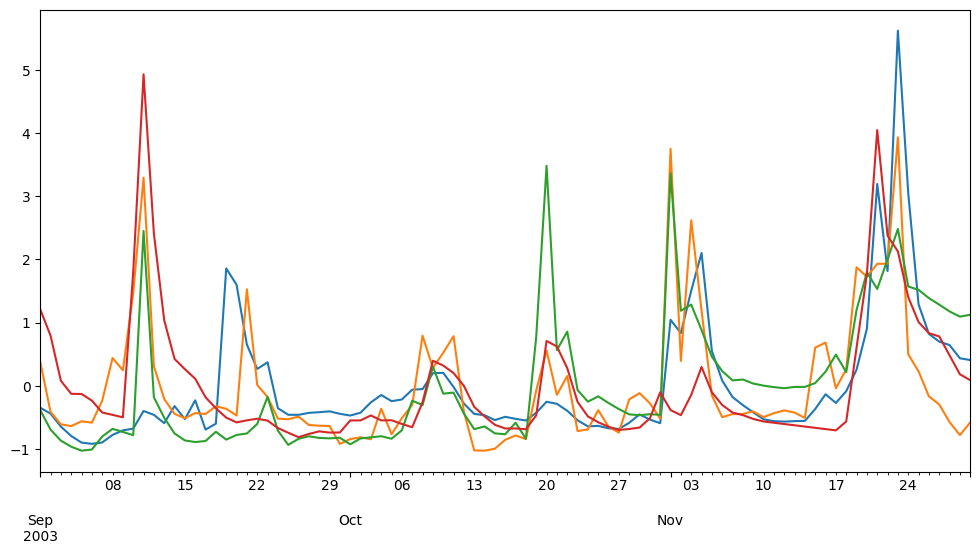

In [320]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

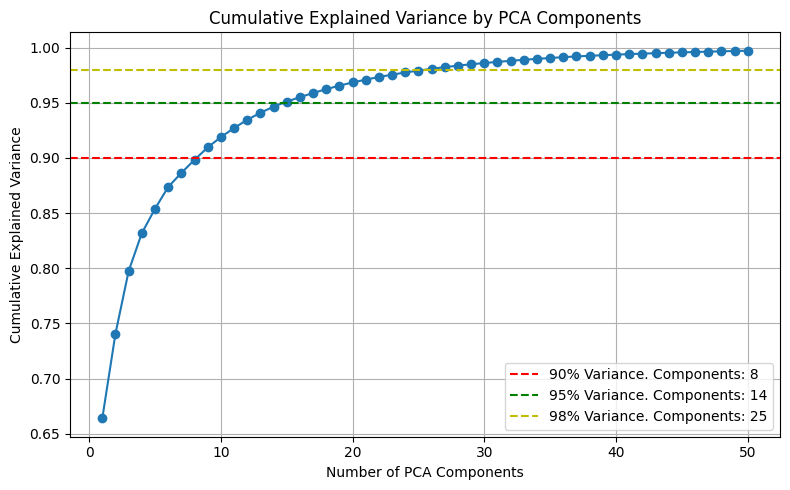

In [321]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [322]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-4.19389731e+00,  6.85175653e+00,  1.00596683e+00, ...,
        -9.01969070e-01,  1.55747344e+00, -7.09901291e-02],
       [-6.30332150e+00,  4.95589722e+00,  1.76574922e+00, ...,
        -1.06641898e+00,  2.80242964e-01, -5.77639764e-01],
       [-8.16088542e+00,  2.82474562e+00,  1.18852633e+00, ...,
        -2.97124836e-01, -9.34439366e-01, -3.65487885e-01],
       ...,
       [ 2.11181035e+01, -5.71835759e+00,  1.21516851e+01, ...,
         4.63856929e-01, -4.30047288e-01,  1.00002298e-02],
       [ 1.68614322e+01, -5.88409882e+00,  1.08287547e+01, ...,
         3.25945944e-01, -2.74639866e-01, -7.51629451e-01],
       [ 1.61530340e+01, -6.18648998e+00,  8.97831679e+00, ...,
         1.67982720e-01,  4.17994287e-01, -6.13399282e-02]],
      shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_56256\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


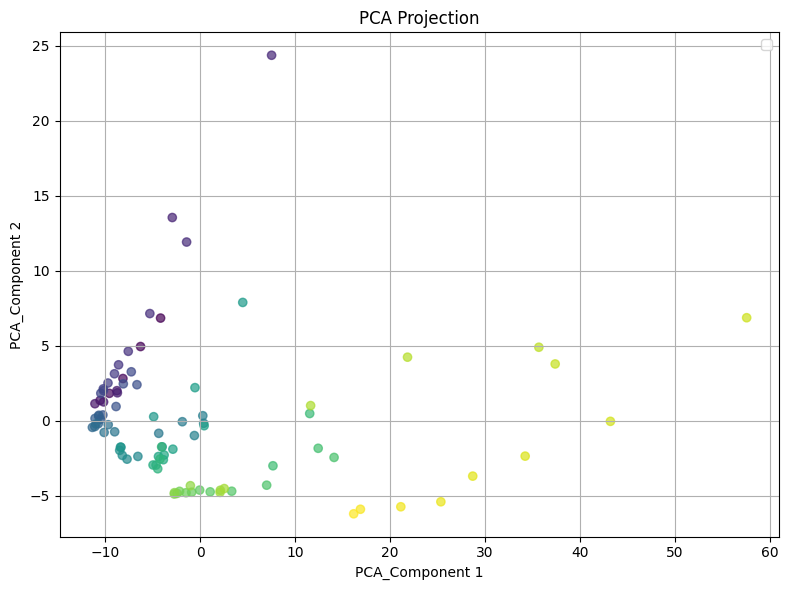

In [323]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_56256\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


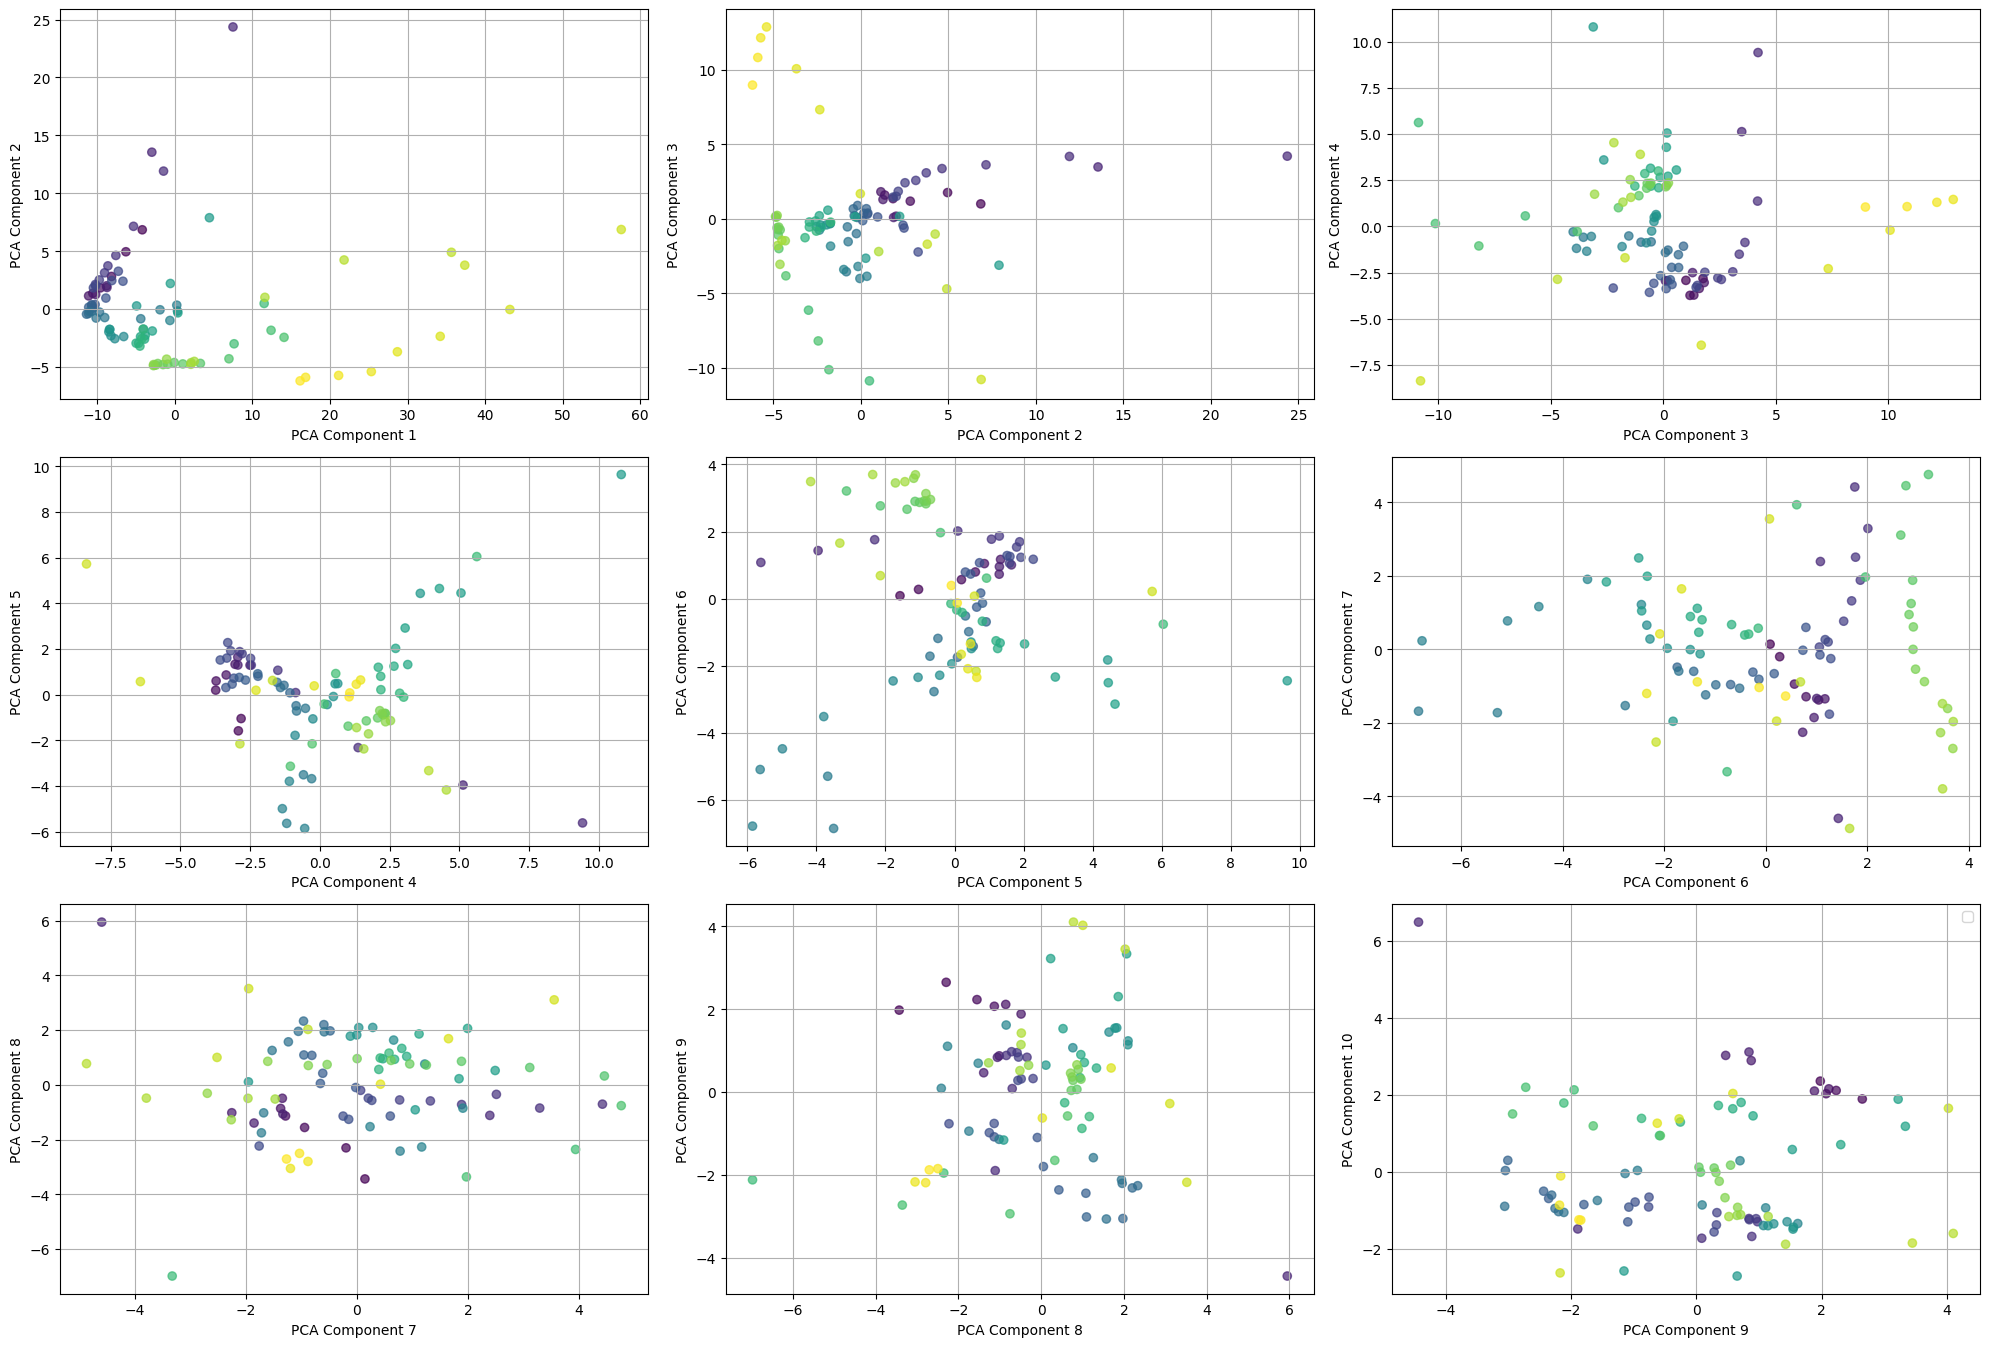

In [324]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [325]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.459
KMeans Davies-Bouldin Index is 1.097


<Axes: xlabel='k'>

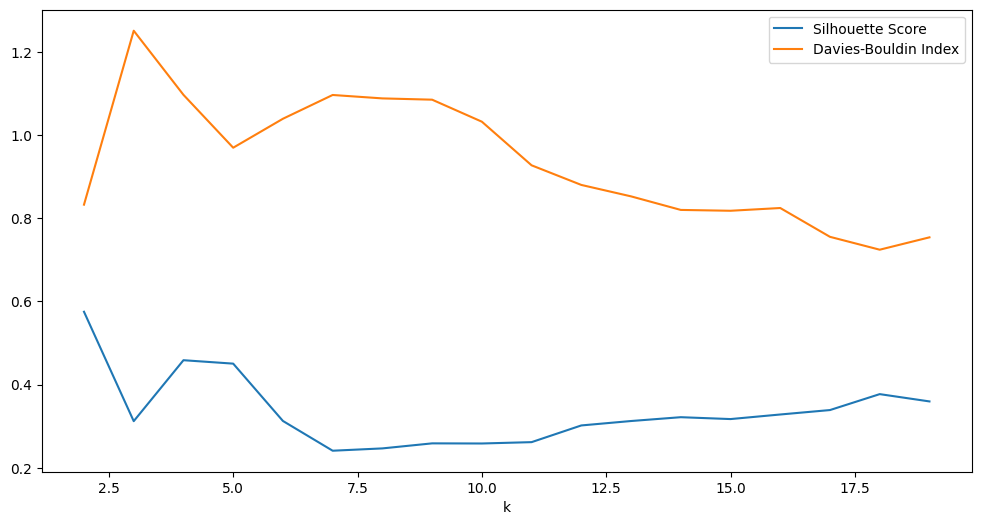

In [326]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         0     91               NaN   
2    1.01            3         0     91               NaN   
3    1.27            3         1     88               NaN   
4    1.52            3         2     85         -0.227894   
5    1.78            3         7     63         -0.136006   
6    2.03            3         7     58         -0.072679   
7    2.29            3         6     57         -0.039574   
8    2.54            3         7     51          0.005594   
9    2.80            3         7     45          0.073373   
10   3.05            3         7     43          0.095254   
11   3.31            3         7     39          0.135853   
12   3.56            3         6     38          0.094022   
13   3.82            3         6     38          0.094022   
14   4.07            3         6     32          0.124555   
15   4.33            3         7     29          0.154121   
16   4.58            3         6     29          0.164437   
17   4.84            3         6     28          0.174167   
18   5.09            3         6     23          0.153040   
19   5.35            3         6     21          0.164321   
20   5.60            3         6     21          0.164321   
21   5.86            3         5     21          0.206364   
22   6.11            3         4     19          0.152863   
23   6.37            3         4     16          0.192542   
24   6.62            3         2     16          0.476346   
25   6.88            3         2     16          0.476346   
26   7.13            3         2     16          0.476346   
27   7.39            3         2     16          0.476346   
28   7.64            3         2     16          0.476346   
29   7.90            3         2     15          0.483975   
30   8.15            3         2     12          0.538248   
31   8.41            3         2     10          0.532070   
32   8.66            3         2     10          0.532070   
33   8.92            3         2     10          0.532070   
34   9.17            3         2     10          0.532070   
35   9.43            3         2     10          0.532070   
36   9.68            3         2     10          0.532070   
37   9.94            3         2     10          0.532070   
38  10.19            3         2     10          0.532070   
39  10.45            3         2     10          0.532070   
40  10.70            3         2     10          0.532070   
41  10.96            3         2     10          0.532070   
42  11.21            3         2     10          0.532070   
43  11.47            3         2     10          0.532070   
44  11.72            3         2     10          0.532070   
45  11.98            3         2     10          0.532070   
46  12.23            3         2     10          0.532070   
47  12.49            3         2      9          0.544772   
48  12.74            3         2      7          0.544691   
49  13.00            3         2      6          0.545322   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4               2.010883  
5               1.490525  
6               1.486172  
7               1.523863  
8               1.594537  
9               1.471898  
10              1.423294  
11              1.348411  
12              1.422818  
13              1.422818  
14              1.333389  
15              1.303963  
16              1.298554  
17              1.271885  
18              1.372027  
19              1.346522  
20              1.346522  
21              1.363347  
22              1.332904  
23              1.360067  
24              1.378633  
25              1.378633  
26              1.378633  
27              1.378633  
28              1.378633  
29              1.349693  
30              1.426890  
31              1.475452  
32 

<Axes: xlabel='eps'>

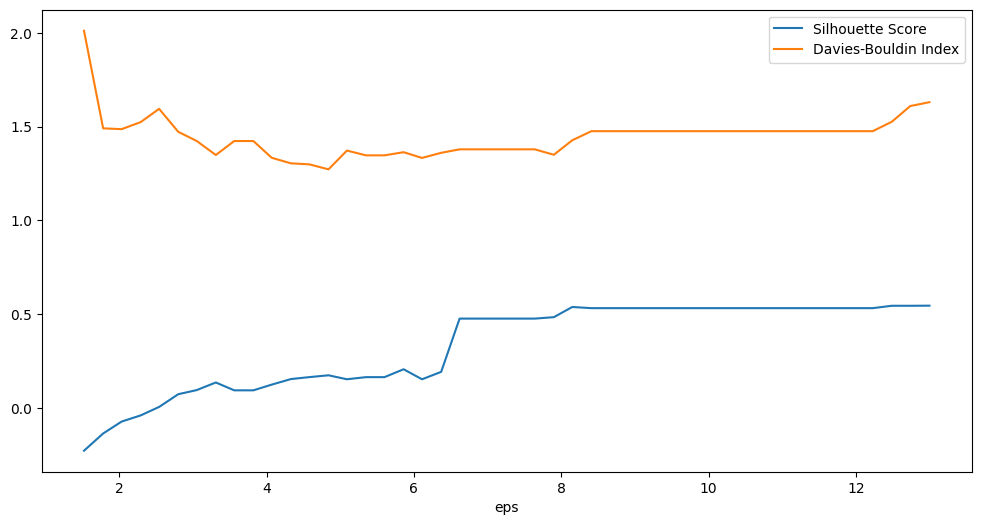

In [327]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

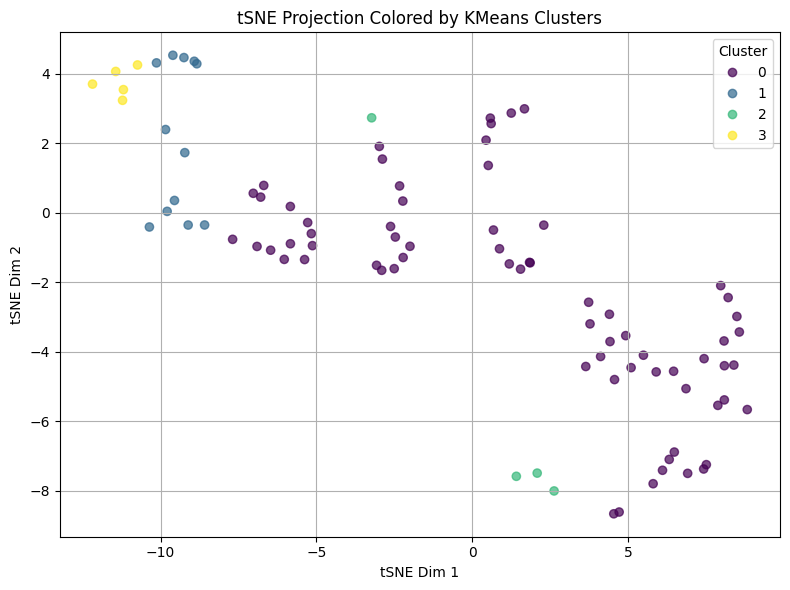

In [328]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        12     65          0.004118              0.758026
1   0.07            2         9     35         -0.109873              0.991256
2   0.09            2         4     20         -0.135501              1.022518
3   0.11            2         2     15          0.688302              0.221657
4   0.13            2         3     11          0.227213              0.669580
5   0.15            2         3     10          0.228434              0.683018
6   0.17            2         3      9          0.297306              0.693561
7   0.19            2         2      9          0.675809              0.265814
8   0.21            2         2      8          0.675087              0.266449
9   0.22            2         2      8          0.675087              0.266449
10  0.24            2         2      6          0.681627              0.313360
11  0.26            2         2      6          0.681627              0.313360
12  0.28            2         2      5          0.680141              0.314473
13  0.30            2         2      5          0.680141              0.314473
14  0.32            2         1      5               NaN                   NaN
15  0.34            2         2      3          0.808517              0.207890
16  0.36            2         2      3          0.808517              0.207890
17  0.38            2         2      2          0.820950              0.233190
18  0.40            2         2      2          0.820950              0.233190
19  0.42            2         2      2          0.820950              0.233190
20  0.44            2         2      2          0.820950              0.233190
21  0.46            2         2      2          0.820950              0.233190
22  0.48            2         2      1          0.819519              0.234189
23  0.50            2         2      1          0.819519              0.234189
24  0.52            2         2      1          0.819519              0.234189
25  0.53            2         2      1          0.819519              0.234189
26  0.55            2         2      1          0.819519              0.234189
27  0.57            2         2      1          0.819519              0.234189
28  0.59            2         2      1          0.819519              0.234189
29  0.61            2         2      1          0.819519              0.234189
30  0.63            2         2      1          0.819519              0.234189
31  0.65            2         2      1          0.819519              0.234189
32  0.67            2         2      1          0.819519              0.234189
33  0.69            2         2      1          0.819519              0.234189
34  0.71            2         2      1          0.819519              0.234189
35  0.73            2         2      1          0.819519              0.234189
36  0.75            2         2      1          0.819519              0.234189
37  0.77            2         2      1          0.819519              0.234189
38  0.79            2         2      1          0.819519              0.234189
39  0.81            2         2      1          0.819519              0.234189
40  0.83            2         1      1               NaN                   NaN
41  0.84            2         1      1               NaN                   NaN
42  0.86            2         1      1               NaN                   NaN
43  0.88            2         1      1               NaN                   NaN
44  0.90            2         1      1               NaN                   NaN
45  0.92            2         1      1               NaN                   NaN
46  0.94            2         1      1               NaN                   NaN
47  0.96            2         1      1               NaN                   NaN
48  0.98            2         1      1               NaN                   NaN
49  1.00            2         1      1               Na

<Axes: xlabel='eps'>

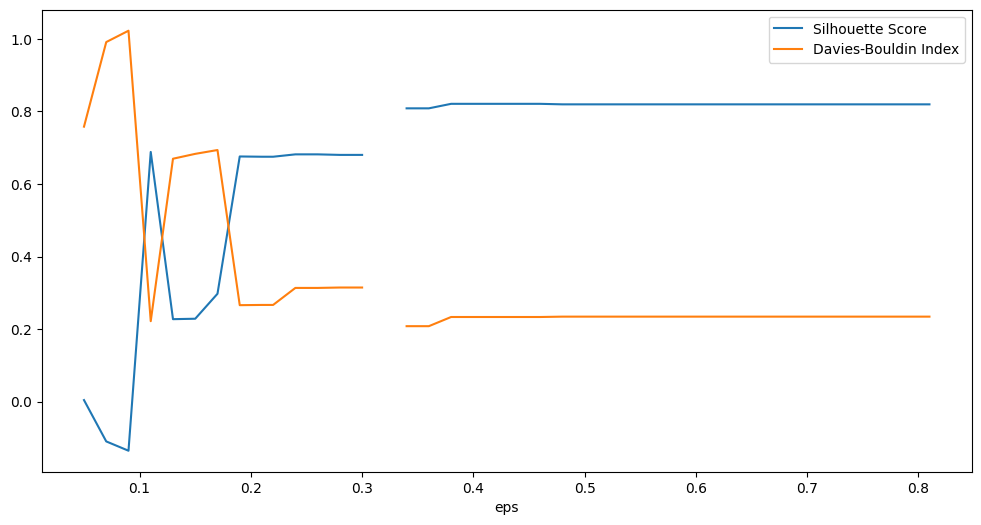

In [329]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [330]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [331]:
season = 4
season_year = 2003
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2003-12-01 to 2004-02-29
Columns: 280 entries, 10000009 to 22000047
dtypes: float64(280)
memory usage: 199.8 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2003-12-01  0.886660  0.575222  0.378855  0.851654  0.436662  1.016659   
2003-12-02  0.843609  0.553012  0.363055  0.846990  0.414059  1.033439   
2003-12-03  0.804414  0.545675  0.353292  0.819389  0.402032  1.032210   
2003-12-04  0.779894  0.540211  0.346670  0.805703  0.395178  1.015169   
2003-12-05  0.774401  0.563431  0.357481  0.807094  0.404534  0.985151   
...              ...       ...       ...       ...       ...       ...   
2004-02-25  0.825904  0.677605  0.538977  0.799591  0.546668  1.424576   
2004-02-26  0.819561  0.676578  0.527644  0.800898  0.541391  1.409806   
2004-02-27  0.822336  0.665063  0.508364  0.770415  0.524213  1.379715   
2004-02-28  0.806515  0.662042  0.490562  0.767321  0.507560  1.349698   
2004-02-29  0.773808  0.646479  0.464321  0.755319  0.481362  1.309517   

            11000016  13000011  13000019  14000016  ...  64000025  66000014  \
2003-12-01  1.357818  0.543904  

          2003-12-01  2003-12-02  2003-12-03  2003-12-04  2003-12-05  \
10000009   -0.035212   -0.035779   -0.037325   -0.038499   -0.037762   
10000010   -0.061900   -0.061050   -0.060056   -0.059510   -0.056508   
10000011   -0.078728   -0.077569   -0.076958   -0.076477   -0.074807   
10000014   -0.038211   -0.035485   -0.036009   -0.036237   -0.034857   
10000016   -0.073774   -0.073134   -0.072676   -0.072224   -0.070627   
...              ...         ...         ...         ...         ...   
7000003    -0.046505   -0.047087   -0.049664   -0.051805   -0.051122   
8000001    -0.023037   -0.024505   -0.027181   -0.029881   -0.028547   
9000001     0.002901   -0.002177   -0.009487   -0.013336   -0.015436   
9000015     0.000210   -0.004153   -0.010664   -0.014101   -0.015898   
22000047   -0.019538   -0.018085   -0.015864   -0.014655   -0.012392   

          2003-12-06  2003-12-07  2003-12-08  2003-12-09  2003-12-10  ...  \
10000009   -0.038976   -0.041013   -0.041857   -0.041660  

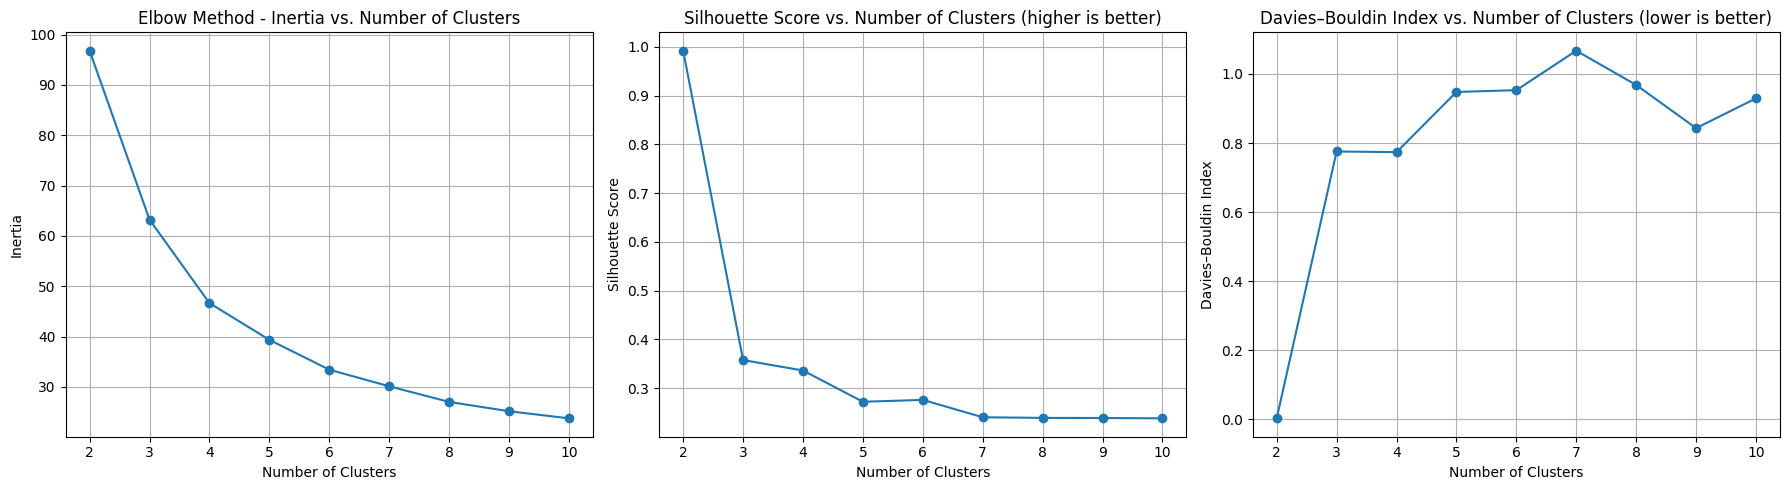

In [332]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2003-12-01  0.886660  0.575222  0.378855  0.851654  0.436662  1.016659   
2003-12-02  0.843609  0.553012  0.363055  0.846990  0.414059  1.033439   
2003-12-03  0.804414  0.545675  0.353292  0.819389  0.402032  1.032210   
2003-12-04  0.779894  0.540211  0.346670  0.805703  0.395178  1.015169   
2003-12-05  0.774401  0.563431  0.357481  0.807094  0.404534  0.985151   
...              ...       ...       ...       ...       ...       ...   
2004-02-25  0.825904  0.677605  0.538977  0.799591  0.546668  1.424576   
2004-02-26  0.819561  0.676578  0.527644  0.800898  0.541391  1.409806   
2004-02-27  0.822336  0.665063  0.508364  0.770415  0.524213  1.379715   
2004-02-28  0.806515  0.662042  0.490562  0.767321  0.507560  1.349698   
2004-02-29  0.773808  0.646479  0.464321  0.755319  0.481362  1.309517   

            11000016  13000011  13000019  14000016  ...  64000025  66000014  \
2003-12-01  1.357818  0.543904  

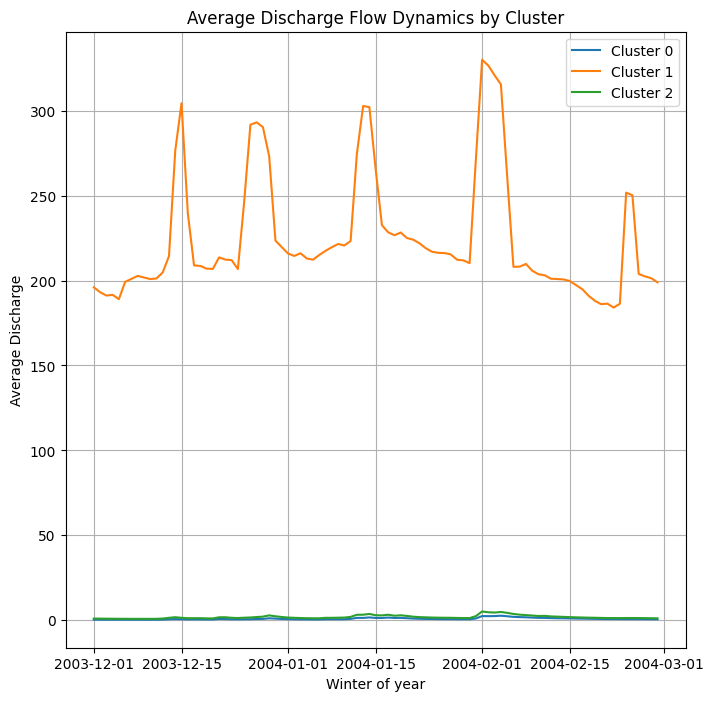

In [333]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [334]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [335]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2003-12-01  0.886660  0.575222  0.378855  0.851654  0.436662  1.016659   
2003-12-02  0.843609  0.553012  0.363055  0.846990  0.414059  1.033439   
2003-12-03  0.804414  0.545675  0.353292  0.819389  0.402032  1.032210   
2003-12-04  0.779894  0.540211  0.346670  0.805703  0.395178  1.015169   
2003-12-05  0.774401  0.563431  0.357481  0.807094  0.404534  0.985151   
...              ...       ...       ...       ...       ...       ...   
2004-02-25  0.825904  0.677605  0.538977  0.799591  0.546668  1.424576   
2004-02-26  0.819561  0.676578  0.527644  0.800898  0.541391  1.409806   
2004-02-27  0.822336  0.665063  0.508364  0.770415  0.524213  1.379715   
2004-02-28  0.806515  0.662042  0.490562  0.767321  0.507560  1.349698   
2004-02-29  0.773808  0.646479  0.464321  0.755319  0.481362  1.309517   

            11000016  13000011  13000019  14000016  ...  64000025  66000014  \
2003-12-01  1.357818  0.543904  0.931293  0.871319  ...  0.025599  0.620904   
2003-12-02  1.157450  0.529696  0.862195  0.857010  ...  0.022345  0.514842   
2003-12-03  0.968214  0.520325  0.828281  0.843621  ...  0.021911  0.444914   
2003-12-04  0.866523  0.516773  0.807178  0.834616  ...  0.022128  0.374766   
2003-12-05  0.817314  0.508838  0.800676  0.832770  ...  0.022562  0.366533   
...              ...       ...       ...       ...  ...       ...       ...   
2004-02-25  1.197295  0.727019  0.947002  0.989448  ...  0.533030  0.631316   
2004-02-26  1.226638  0.722258  0.946935  0.983130  ...  0.481180  0.588084   
2004-02-27  1.178492  0.661497  0.959693  0.965292  ...  0.432585  0.532946   
2004-02-28  1.105403  0.610409  0.935417  0.955356  ...  0.385508  0.471836   
2004-02-29  1.049946  0.572018  0.894043  0.934133  ...  0.310229  0.412811   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2003-12-01  1.054238  1.373973  1.658467  0.754873  1.028730  1.331411   
2003-12-02  0.879705  1.142069  1.461511  0.713578  0.973243  1.229995   
2003-12-03  0.770460  0.996914  1.294097  0.663961  0.919878  1.121268   
2003-12-04  0.690597  0.890799  1.243185  0.628105  0.878205  1.066938   
2003-12-05  0.646725  0.832506  1.158505  0.624043  0.878109  1.025668   
...              ...       ...       ...       ...       ...       ...   
2004-02-25  0.706573  0.792737  0.776834  0.862212  0.943805  1.995718   
2004-02-26  0.689970  0.640116  0.737998  0.846555  0.928991  2.131074   
2004-02-27  0.603779  0.595079  0.682350  0.795464  0.883952  2.003207   
2004-02-28  0.504749  0.642254  0.632286  0.771535  0.855441  1.835038   
2004-02-29  0.496538  1.132108  0.546432  0.739560  0.824003  1.702747   

             9000015  22000047  
2003-12-01  1.300002  1.069560  
2003-12-02  1.207283  1.047077  
2003-12-03  1.107878  1.048683  
2003-12-04  1.058207  1.051895  
2003-12-05  1.020476  1.059925  
...              ...       ...  
2004-02-25  1.907348  0.521933  
2004-02-26  2.031097  0.521933  
2004-02-27  1.914195  0.510691  
2004-02-28  1.760446  0.504267  
2004-02-29  1.639498  0.496238  

[91 rows x 280 columns]

<Axes: >

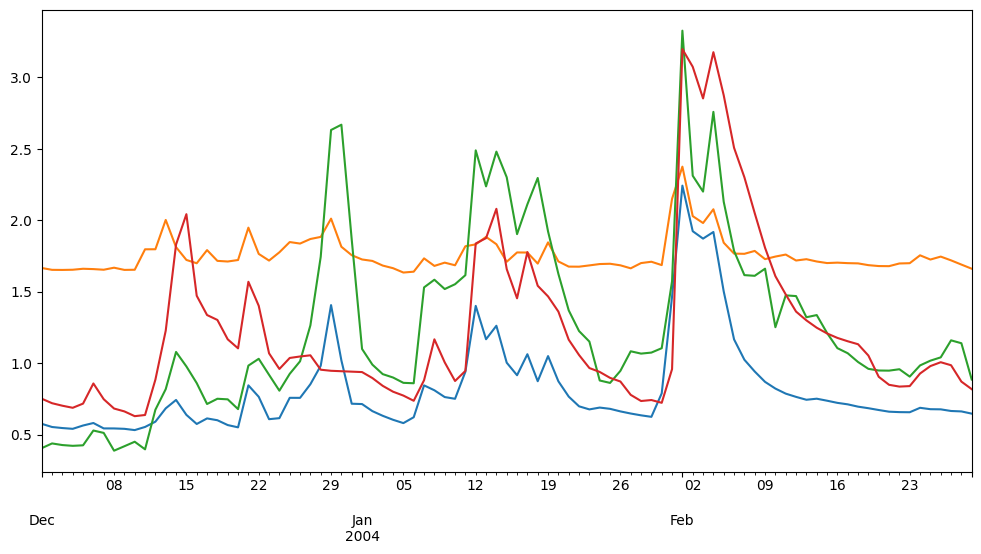

In [336]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

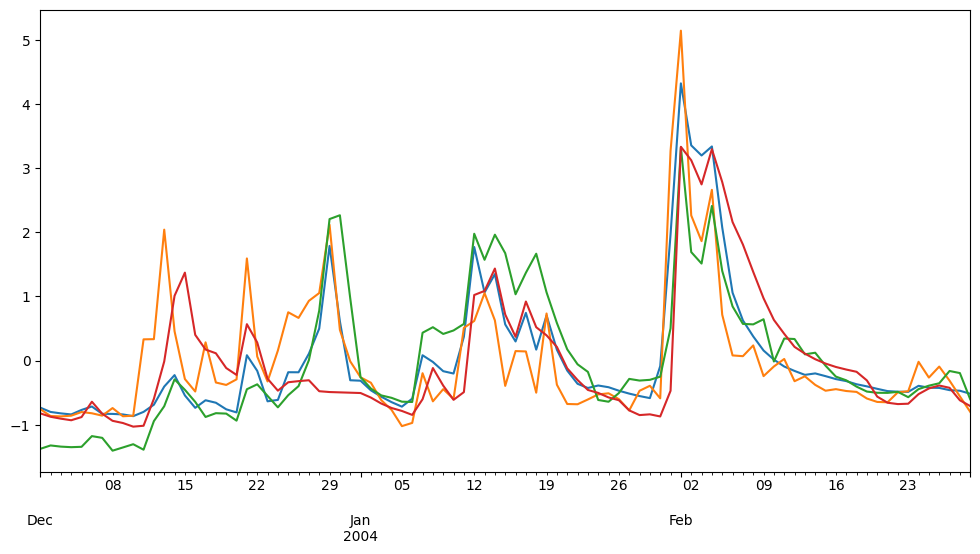

In [337]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

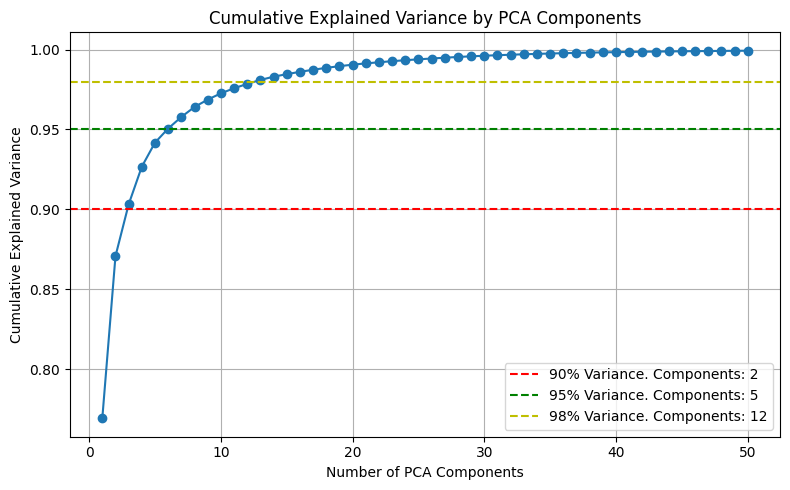

In [338]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [339]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-14.60891182,  -1.92576784,  -1.35293514, ...,  -0.10905212,
         -0.06828667,   0.56772817],
       [-15.26070308,  -1.5910586 ,  -1.4441391 , ...,   0.03042909,
         -0.06706451,   0.25574846],
       [-15.67594769,  -1.40050074,  -1.433151  , ...,   0.08276196,
          0.0589392 ,   0.1990911 ],
       ...,
       [ -7.1933088 ,   2.03157167,   3.31451415, ...,  -0.68056853,
         -0.38710757,  -0.225228  ],
       [ -8.2079289 ,   2.10222908,   3.06847478, ...,  -0.62935477,
         -0.31522512,  -0.34958523],
       [ -9.28208559,   2.2254191 ,   2.81964369, ...,  -0.55022348,
         -0.12358367,  -0.43043385]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_56256\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


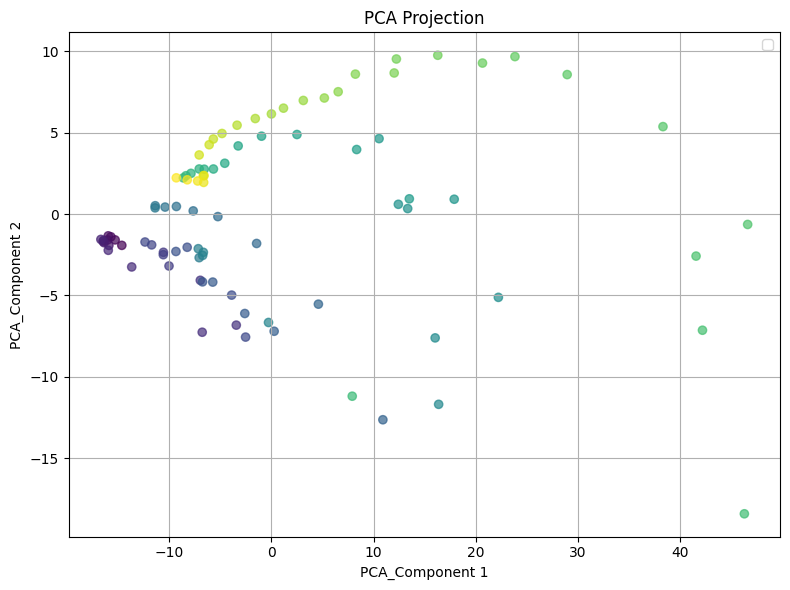

In [340]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_56256\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


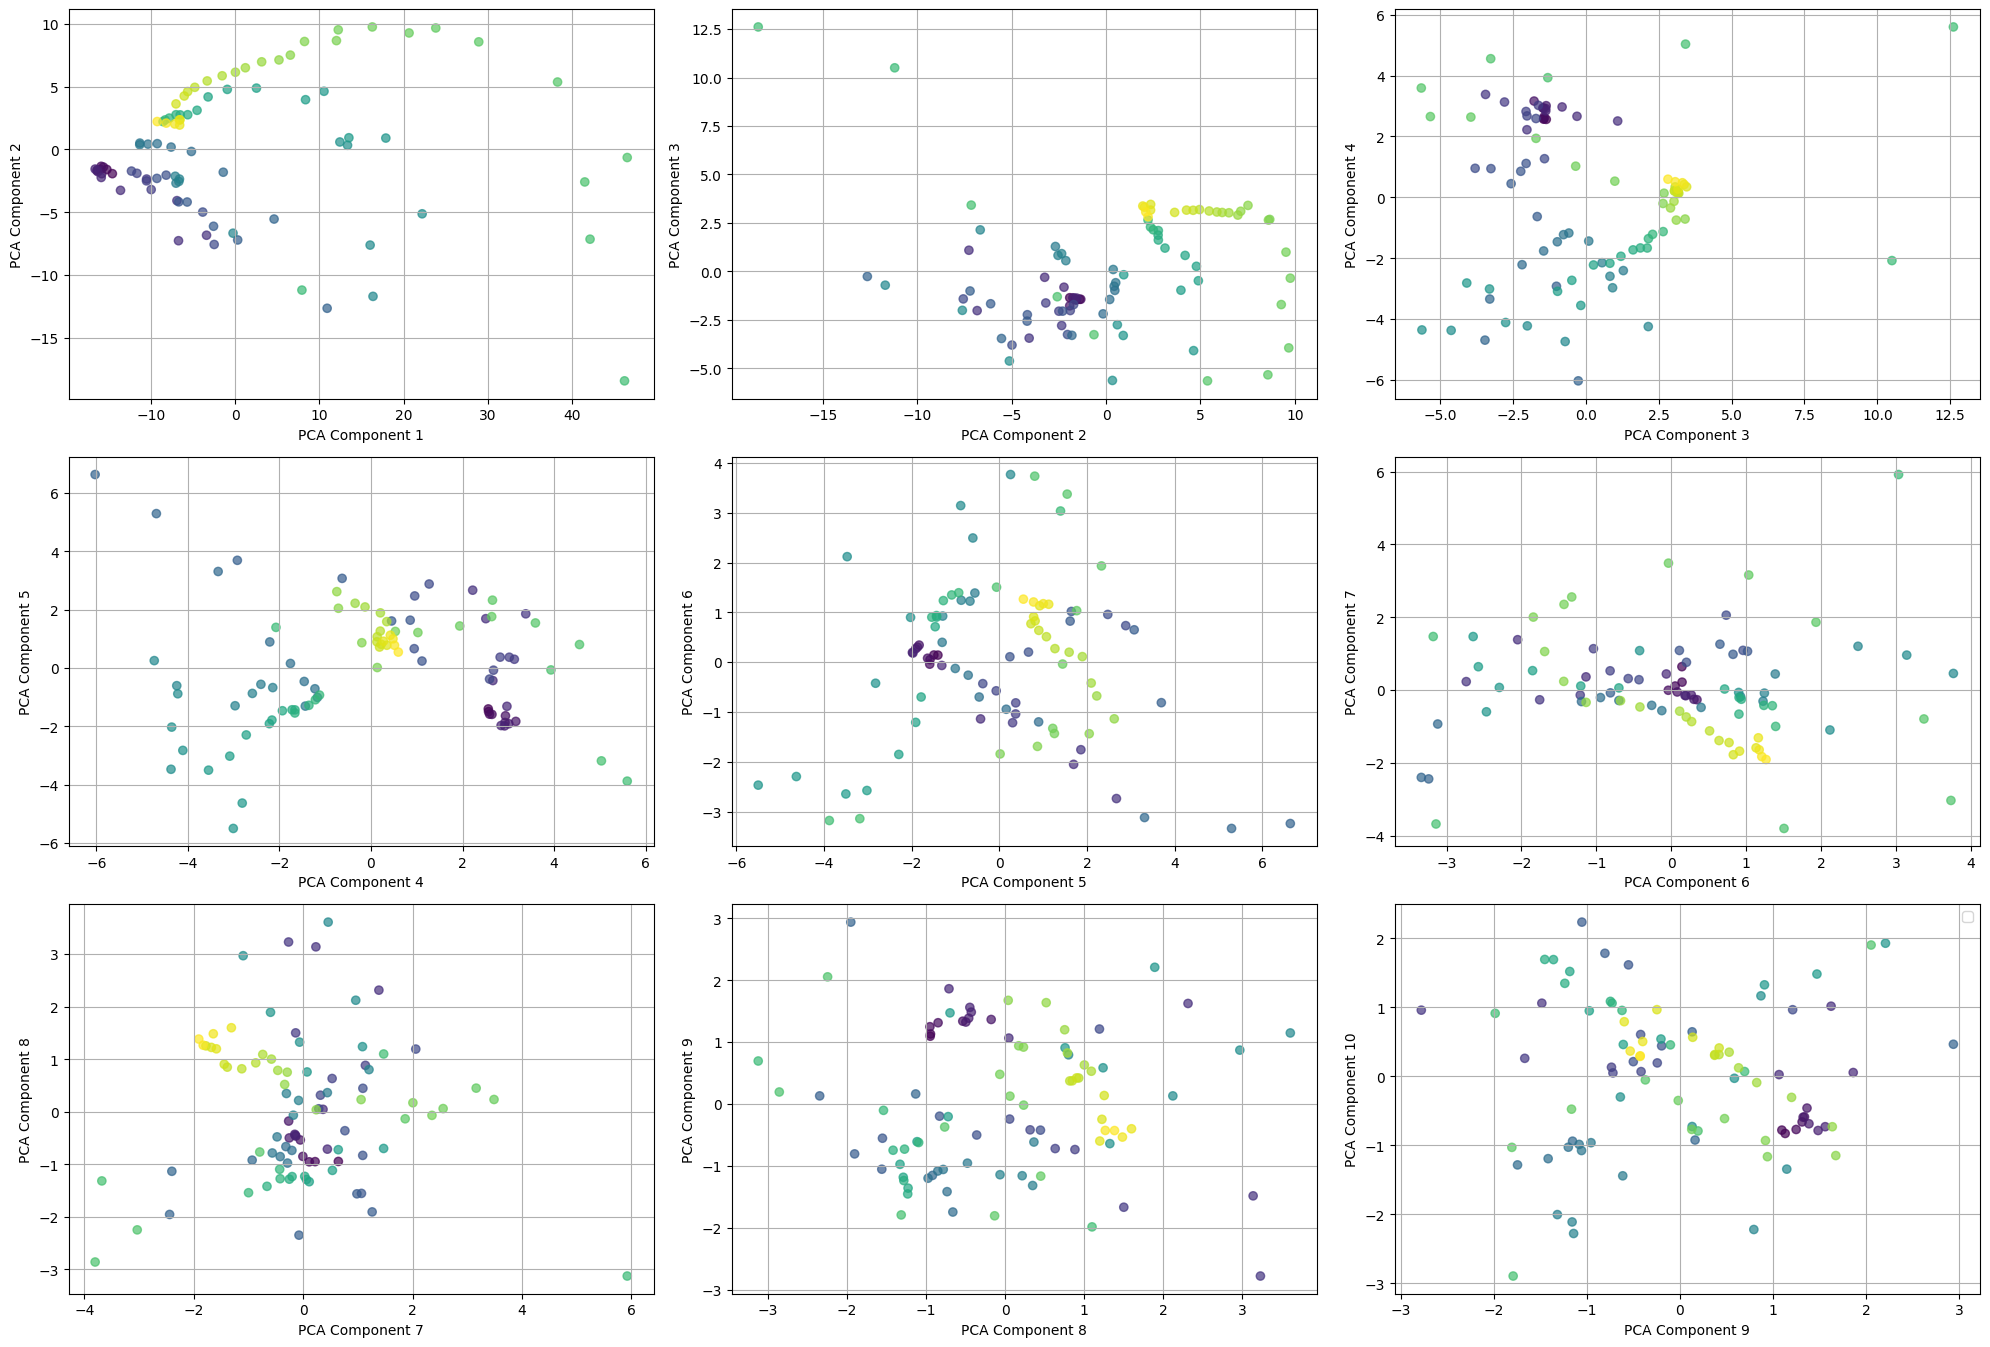

In [341]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [342]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.460
KMeans Davies-Bouldin Index is 1.029


<Axes: xlabel='k'>

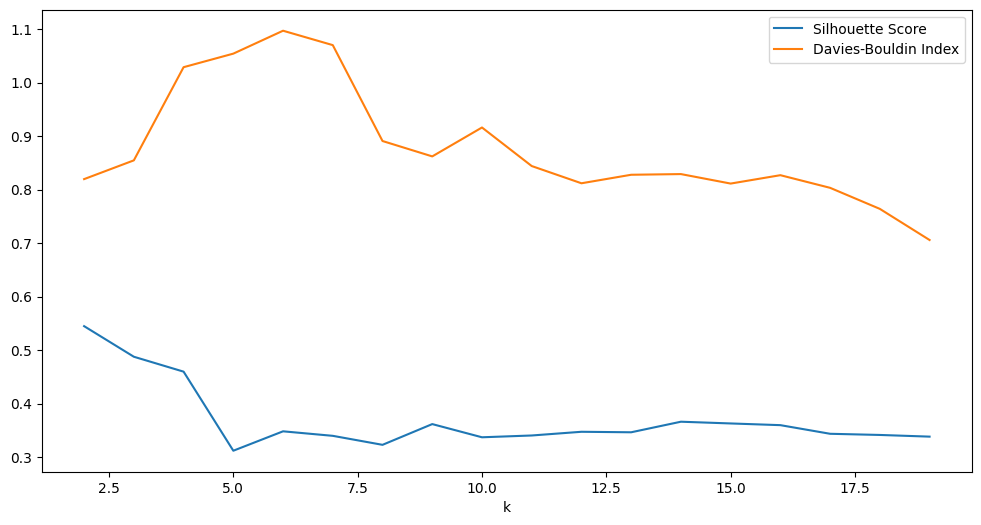

In [343]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         1     87               NaN   
1    0.76            3         2     84         -0.046330   
2    1.01            3         1     82               NaN   
3    1.27            3         4     71         -0.128849   
4    1.52            3         6     60          0.009740   
5    1.78            3         8     50          0.074938   
6    2.03            3         8     48          0.099442   
7    2.29            3         6     44          0.151664   
8    2.54            3         6     42          0.134105   
9    2.80            3         6     42          0.134105   
10   3.05            3         6     39          0.140550   
11   3.31            3         6     36          0.168265   
12   3.56            3         5     35          0.143749   
13   3.82            3         5     35          0.143749   
14   4.07            3         5     34          0.146856   
15   4.33            3         5     30          0.123257   
16   4.58            3         5     28          0.104769   
17   4.84            3         5     28          0.104769   
18   5.09            3         3     28          0.116683   
19   5.35            3         2     25          0.244559   
20   5.60            3         1     23               NaN   
21   5.86            3         1     23               NaN   
22   6.11            3         1     21               NaN   
23   6.37            3         2     15          0.241111   
24   6.62            3         2     14          0.249606   
25   6.88            3         1     14               NaN   
26   7.13            3         1     13               NaN   
27   7.39            3         1     13               NaN   
28   7.64            3         1     13               NaN   
29   7.90            3         1     13               NaN   
30   8.15            3         1     11               NaN   
31   8.41            3         1     11               NaN   
32   8.66            3         1     11               NaN   
33   8.92            3         1     11               NaN   
34   9.17            3         2      7          0.390204   
35   9.43            3         2      7          0.390204   
36   9.68            3         2      7          0.390204   
37   9.94            3         3      4          0.389838   
38  10.19            3         3      4          0.389838   
39  10.45            3         3      4          0.389838   
40  10.70            3         2      4          0.507985   
41  10.96            3         2      3          0.481882   
42  11.21            3         2      3          0.481882   
43  11.47            3         2      2          0.530892   
44  11.72            3         2      2          0.530892   
45  11.98            3         1      2               NaN   
46  12.23            3         1      2               NaN   
47  12.49            3         1      2               NaN   
48  12.74            3         1      2               NaN   
49  13.00            3         1      2               NaN   

    Davies-Bouldin Index  
0                    NaN  
1               0.811581  
2                    NaN  
3               1.291357  
4               1.150129  
5               1.146413  
6               1.121289  
7               1.015464  
8               1.065834  
9               1.065834  
10              1.108280  
11              1.060870  
12              1.095804  
13              1.095804  
14              1.168093  
15              1.213830  
16              1.250747  
17              1.250747  
18              1.227908  
19              1.161038  
20                   NaN  
21                   NaN  
22                   NaN  
23              1.719947  
24              1.587927  
25                   NaN  
26                   NaN  
27                   NaN  
28                   NaN  
29                   NaN  
30                   NaN  
31                   NaN  
32 

<Axes: xlabel='eps'>

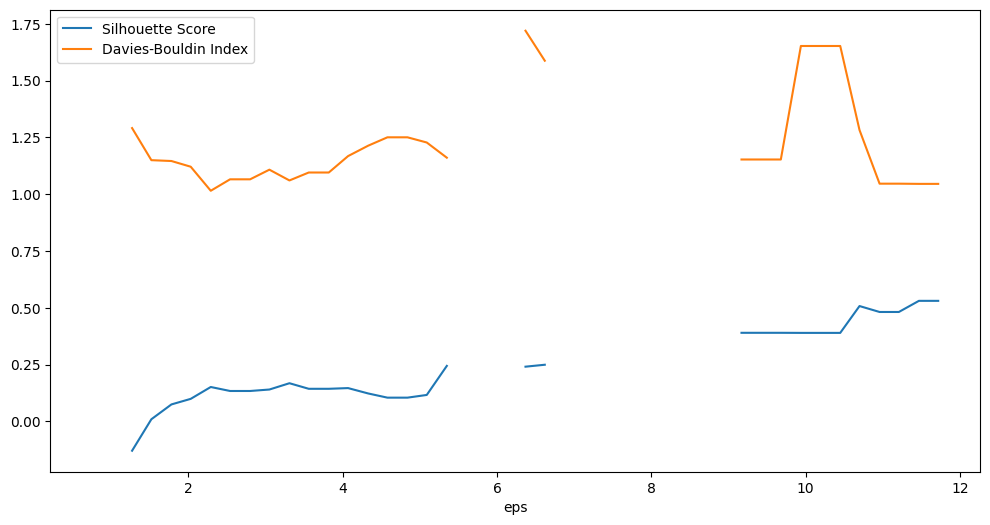

In [344]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

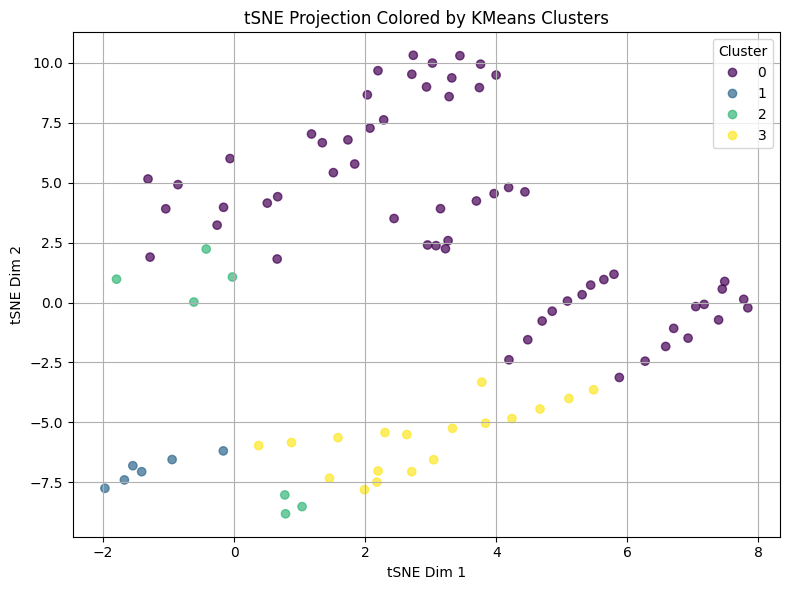

In [345]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        15    244          0.714470   
1    0.05            2        19    234          0.661508   
2    0.06            2        21    226          0.604937   
3    0.06            2        26    210          0.530423   
4    0.07            2        27    200          0.502031   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      3          0.789235   
196  0.99            2         2      3          0.789235   
197  0.99            2         2      3          0.789235   
198  1.00            2         2      3          0.789235   
199  1.00            2         2      3          0.789235   

     Davies-Bouldin Index  
0                0.333187  
1                0.404992  
2                0.441743  
3                0.518854  
4                0.513967  
..                    ...  
195              0.248352  
196              0.248352  
197              0.248352  
198              0.248352  
199              0.248352  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

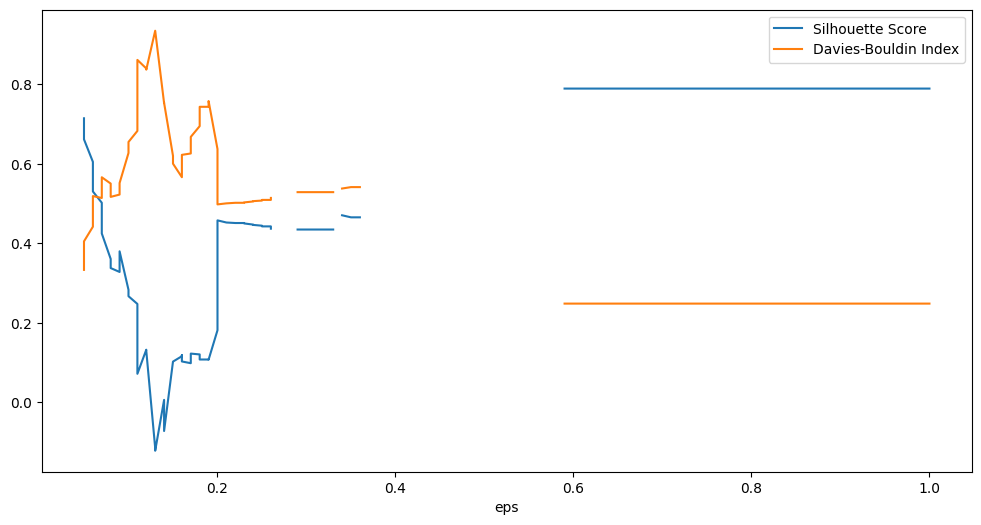

In [346]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))